In [53]:
library(ggplot2)
library(dplyr)
library(tidyverse)

In [54]:
# ggplot theme #
my_theme0 <- theme(panel.background = element_rect(fill = "transparent", 
                                                colour = NA), plot.background = element_rect(colour = 'NA', 
                                                                                             fill = 'transparent'),panel.grid.major=element_line(color=NA),
                axis.line=element_line(size=1.2,color="black"),
                axis.ticks=element_line(color="black"),
                axis.text=element_text(color="black",size=26),
                axis.title=element_text(color="black",size=30),
                panel.grid.minor = element_line(colour = NA),
                legend.text=element_text(size=17),legend.key=element_rect(fill="white"),
                legend.title=element_text(size=18,face="bold"),
                axis.text.x=element_text(angle=60,size=26,vjust=0.5),
                panel.border = element_rect(colour = "black", fill=NA, size=1),
                legend.position = "none")

my_theme1 <- theme_bw() + 
  theme(panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        text = element_text(size = 16),
        axis.title.x = element_text(size=18, color="black"), 
        axis.title.y = element_text(size=18, color="black"), 
        axis.text.x = element_text(angle = 0, hjust = 1, color="black"), 
        panel.grid.minor.x = element_line(colour = "grey", size=0.2, linetype = 'dashed'), 
        panel.grid.major.x = element_line(colour = "grey", size=0.2),
        panel.grid.minor.y = element_line(colour = "grey", size = 0.2, linetype = 'dashed'),
        panel.grid.major.y = element_line(colour = "grey", size=0.2),
        legend.position = "bottom", 
        legend.text=element_text(size=10), 
        legend.key.size = unit(1,"line"), 
        plot.margin=unit(c(1,1,1,1),"cm")
       ) 

* get percentages of HOT and BATS

In [55]:
pct_meta_file <- "/home/shengwei/GitHub/projects/bioGEOTRACES/05_MERGED_DEF_Counts_bamcov/DEF_MERGED_min_2000_pct_meta.tsv"
pct_meta_df <- read.table(pct_meta_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
colnames(pct_meta_df)
GA03_pct_meta_df <- pct_meta_df %>%
  filter(GEOTRACES_Section == "GA03", TotalCnt >= 500) %>% 
  select(NCBI_SRA_Acc, Collection_Year, Collection_Month, Collection_Date, Cruise_Station, Latitude, Longitude, Depth, Total_Read_Pairs, Eukaryote:TotalCnt)
head(GA03_pct_meta_df)

[1] "Sample_Name"                "Sample_ID"                 
 [3] "Cruise_Series"              "GEOTRACES_Section"         
 [5] "Cruise_ID"                  "Cruise_Station"            
 [7] "Collection_Date"            "Collection_Year"           
 [9] "Collection_Month"           "Collection_Time"           
[11] "Depth"                      "Env_Biome"                 
[13] "Env_Feature"                "Env_Material"              
[15] "Geo_Loc_Name"               "Latitude_Longitude"        
[17] "Latitude"                   "Longitude"                 
[19] "Bottle_ID"                  "NCBI_BioPrj"               
[21] "NCBI_SRA_Study"             "NCBI_BioSample"            
[23] "NCBI_SRA_Acc"               "Total_Read_Pairs"          
[25] "Total_Bases"                "NCBI_SRA_Accession_Contigs"
[27] "Assembly_Method"            "Eukaryote"                 
[29] "EukaryoteVirus"             "Plasmid"                   
[31] "Prokaryote"                 "ProkaryoteVirus"           
[33] "TotalCnt"

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,SRR5788141,2011,11,11/16/2011,8,35.41617,-66.54077,31.3,37211638,19.80791,4.189700,25.09433,36.75246,14.15560,16089217
2,SRR5788142,2011,11,11/16/2011,8,35.41617,-66.54077,68.0,17366844,17.89050,3.464874,26.18665,39.57969,12.87829,3577648
3,SRR5788143,2011,11,11/16/2011,8,35.41617,-66.54077,111.1,27088837,16.64615,10.923347,21.77491,21.23480,29.42079,4241905
4,SRR5788138,2011,11,11/16/2011,8,35.41617,-66.54077,135.8,21518702,30.42751,8.782179,20.37178,22.46683,17.95170,4662567
5,SRR5788139,2011,11,11/16/2011,8,35.41617,-66.54077,186.3,29720647,11.80636,8.813066,28.72760,33.89925,16.75373,7068641
6,SRR5788008,2011,11,11/16/2011,8,35.41617,-66.54077,237.3,26798236,12.11076,9.475961,28.12448,33.84449,16.44431,5774095


* Calculate overall percentages among all clean reads

In [135]:
GA03_pct_meta_df2 <- GA03_pct_meta_df %>% 
  mutate(Eukaryote = Eukaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(EukaryoteVirus = EukaryoteVirus * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Plasmid = Plasmid * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Prokaryote = Prokaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Prok_n_Plas = Prokaryote + Plasmid) %>% 
  mutate(ProkaryoteVirus = ProkaryoteVirus * TotalCnt / Total_Read_Pairs)
head(GA03_pct_meta_df2, 2)

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt,Prok_n_Plas
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,SRR5788141,2011,11,11/16/2011,8,35.41617,-66.54077,31.3,37211638,8.564356,1.8115032,10.850052,15.890682,6.120464,16089217,26.74073
2,SRR5788142,2011,11,11/16/2011,8,35.41617,-66.54077,68.0,17366844,3.685523,0.7137797,5.394567,8.153594,2.652986,3577648,13.54816


In [136]:
table(GA03_pct_meta_df2$Longitude)
table(GA03_pct_meta_df2$Depth)


-69.86286 -69.13131 -68.87553  -68.3895 -66.54077 -64.17499 -49.63297 -44.82622 
        7         8         8         8         7         8         8         8 
-40.21786 -35.86703 -29.38323 -24.50003  -24.4998 -22.00011 -20.81672  -20.7835 
        7        10         8         7         7         7         5         1 


     2   28.4   30.2   31.3   31.8   33.2   38.9   39.4   39.6   39.7   39.9 
     3      1      1      1      1      1      1      1      1      1      1 
  40.1   41.8   48.1     50   50.4   51.8   57.7   57.8   60.7   61.2   64.6 
     1      1      1      1      1      1      1      1      1      1      1 
  65.2   65.6     68   69.4   71.6   71.9   72.9   74.3   74.5   75.1   75.7 
     1      1      1      1      1      1      1      1      1      1      1 
    84   86.4   86.6   89.1   89.2   89.3   89.6   89.9   90.8   91.6     99 
     1      1      1      1      1      1      1      1      1      1      1 
  99.7    101  108.8  109.7  109.9  110.7  111.1  113.8  113.9  123.8  133.7 
     1      1      1      1      1      1      3      1      1      1      1 
 134.2    135  135.2  135.4  135.6  135.8  136.5  139.6  140.7  151.8    160 
     1      1      1      1      2      1      1      1      1      1      1 
 182.4  183.7  183.8  183.9    184  184.1    185  185.4  185.7 

In [137]:
LongitudeRange_order <- c("W70-W68", "W67-W64", "W50-W44", "W41-W35", "W30-W24", "W23-W20")
DepthRange_order <- c("D2-D42", "D48-D76", "D84-D124", "D133-D187", "D201-D238", "D281-D301", "D349-D1056")

GA03_pct_meta_df2 <- GA03_pct_meta_df2 %>% 
  mutate(LongitudeRange = case_when(Longitude>=-70 & Longitude<= -68 ~ "W70-W68",
                                   Longitude>=-67 & Longitude<= -64 ~ "W67-W64",
                                   Longitude>=-50 & Longitude<= -44 ~ "W50-W44",
                                   Longitude>=-41 & Longitude<= -35 ~ "W41-W35",
                                   Longitude>=-30 & Longitude<= -24 ~ "W30-W24",
                                   Longitude>=-23 & Longitude<= -20 ~ "W23-W20")) %>%
  mutate(LongitudeRange = factor(LongitudeRange, levels = LongitudeRange_order)) %>%
  mutate(DepthRange = case_when(Depth>=2 & Depth<= 42 ~ "D2-D42",
                                Depth>=48 & Depth<= 76 ~ "D48-D76",
                                Depth>=84 & Depth<= 124 ~ "D84-D124",
                                Depth>=133 & Depth<= 187 ~ "D133-D187",
                                Depth>=201 & Depth<= 238 ~ "D201-D238",
                                Depth>=281 & Depth<= 301 ~ "D281-D301",
                                Depth>=349 & Depth<= 1056 ~ "D349-D1056")) %>%
  mutate(DepthRange = factor(DepthRange, levels = DepthRange_order)) 
head(GA03_pct_meta_df2, 2)

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt,Prok_n_Plas,LongitudeRange,DepthRange
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>
1,SRR5788141,2011,11,11/16/2011,8,35.41617,-66.54077,31.3,37211638,8.564356,1.8115032,10.850052,15.890682,6.120464,16089217,26.74073,W67-W64,D2-D42
2,SRR5788142,2011,11,11/16/2011,8,35.41617,-66.54077,68.0,17366844,3.685523,0.7137797,5.394567,8.153594,2.652986,3577648,13.54816,W67-W64,D48-D76


In [139]:
GA03_pct_meta_df2.long <- GA03_pct_meta_df2 %>% 
  select(LongitudeRange, DepthRange, Eukaryote, EukaryoteVirus, Prok_n_Plas, ProkaryoteVirus) %>% 
  gather(Eukaryote:ProkaryoteVirus, key="Seq_Class", value="Percentage") %>% 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prok_n_Plas", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus"))) 

head(GA03_pct_meta_df2.long)

,LongitudeRange,DepthRange,Seq_Class,Percentage
,<fct>,<fct>,<fct>,<dbl>
1,W67-W64,D2-D42,Eukaryote,8.564356
2,W67-W64,D48-D76,Eukaryote,3.685523
3,W67-W64,D84-D124,Eukaryote,2.606660
4,W67-W64,D133-D187,Eukaryote,6.592884
5,W67-W64,D133-D187,Eukaryote,2.807977
6,W67-W64,D201-D238,Eukaryote,2.609452


In [140]:
rects_7 <- data.frame(xmin = seq(1.5, 14, 2), 
                    xmax = seq(2.5, 15, 2))
rects_3 <- head(rects_7, 3)
rects_1 <- head(rects_7, 1)
head(rects_7, 2)
nrow(rects_7)

,xmin,xmax
,<dbl>,<dbl>
1,1.5,2.5
2,3.5,4.5


[1] 7

In [173]:
col_4 <- brewer.pal(name="Paired", n=4)
col_4 <- c("#daa520", "#0a75ad", "#8a2be2", "#047806")
col_4

[1] "#daa520" "#0a75ad" "#8a2be2" "#047806"

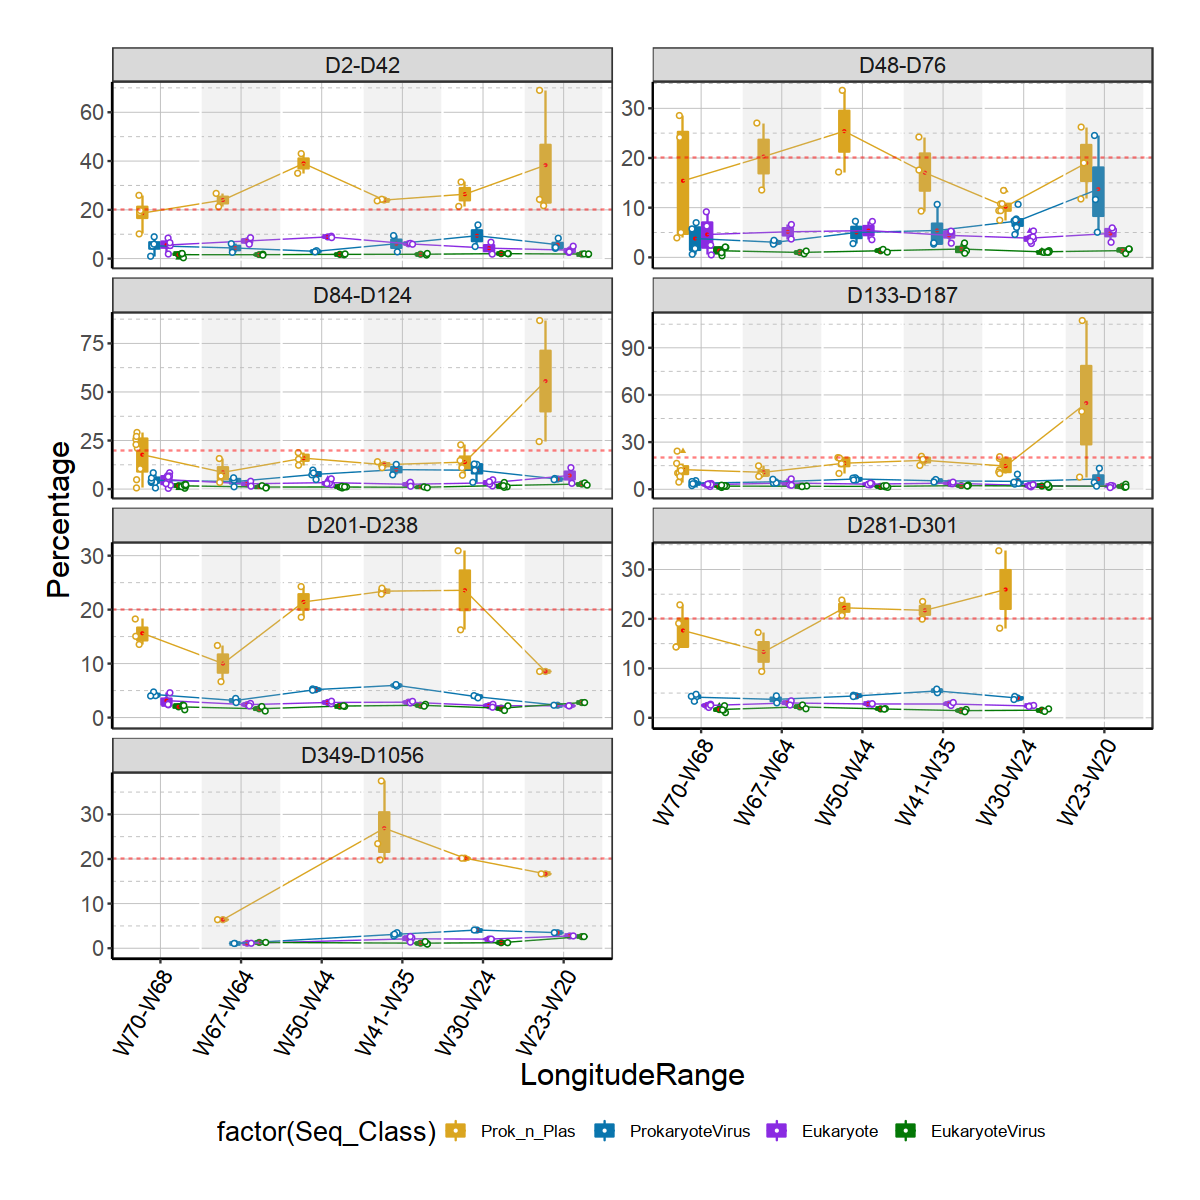

In [179]:
options(repr.plot.width=10, repr.plot.height=10)

p <- ggplot(data=GA03_pct_meta_df2.long, mapping=aes(x=LongitudeRange, y=Percentage, fill=factor(Seq_Class), color=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 6, scales = "free_y") + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) 
p

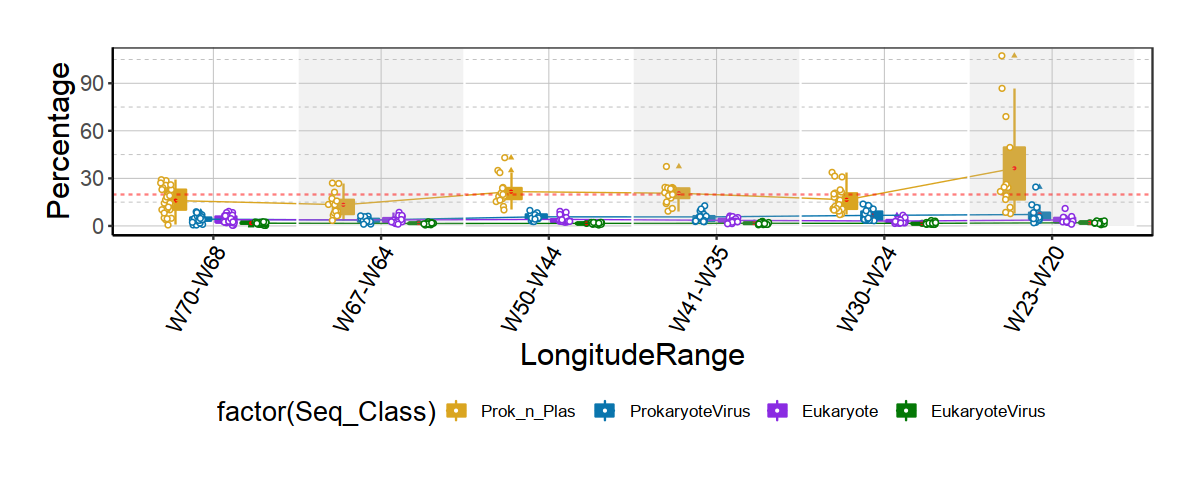

In [175]:
options(repr.plot.width=10, repr.plot.height=4)

p_2 <- ggplot(data=GA03_pct_meta_df2.long, mapping=aes(x=LongitudeRange, y=Percentage, fill=factor(Seq_Class),colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
p_2

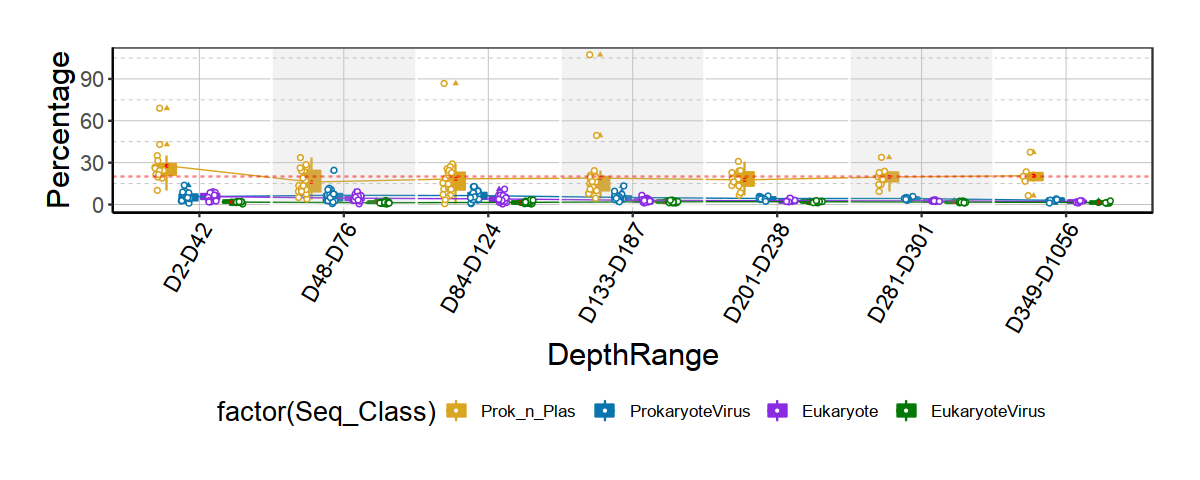

In [176]:
options(repr.plot.width=10, repr.plot.height=4)

p_3 <- ggplot(data=GA03_pct_meta_df2.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class),colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
p_3

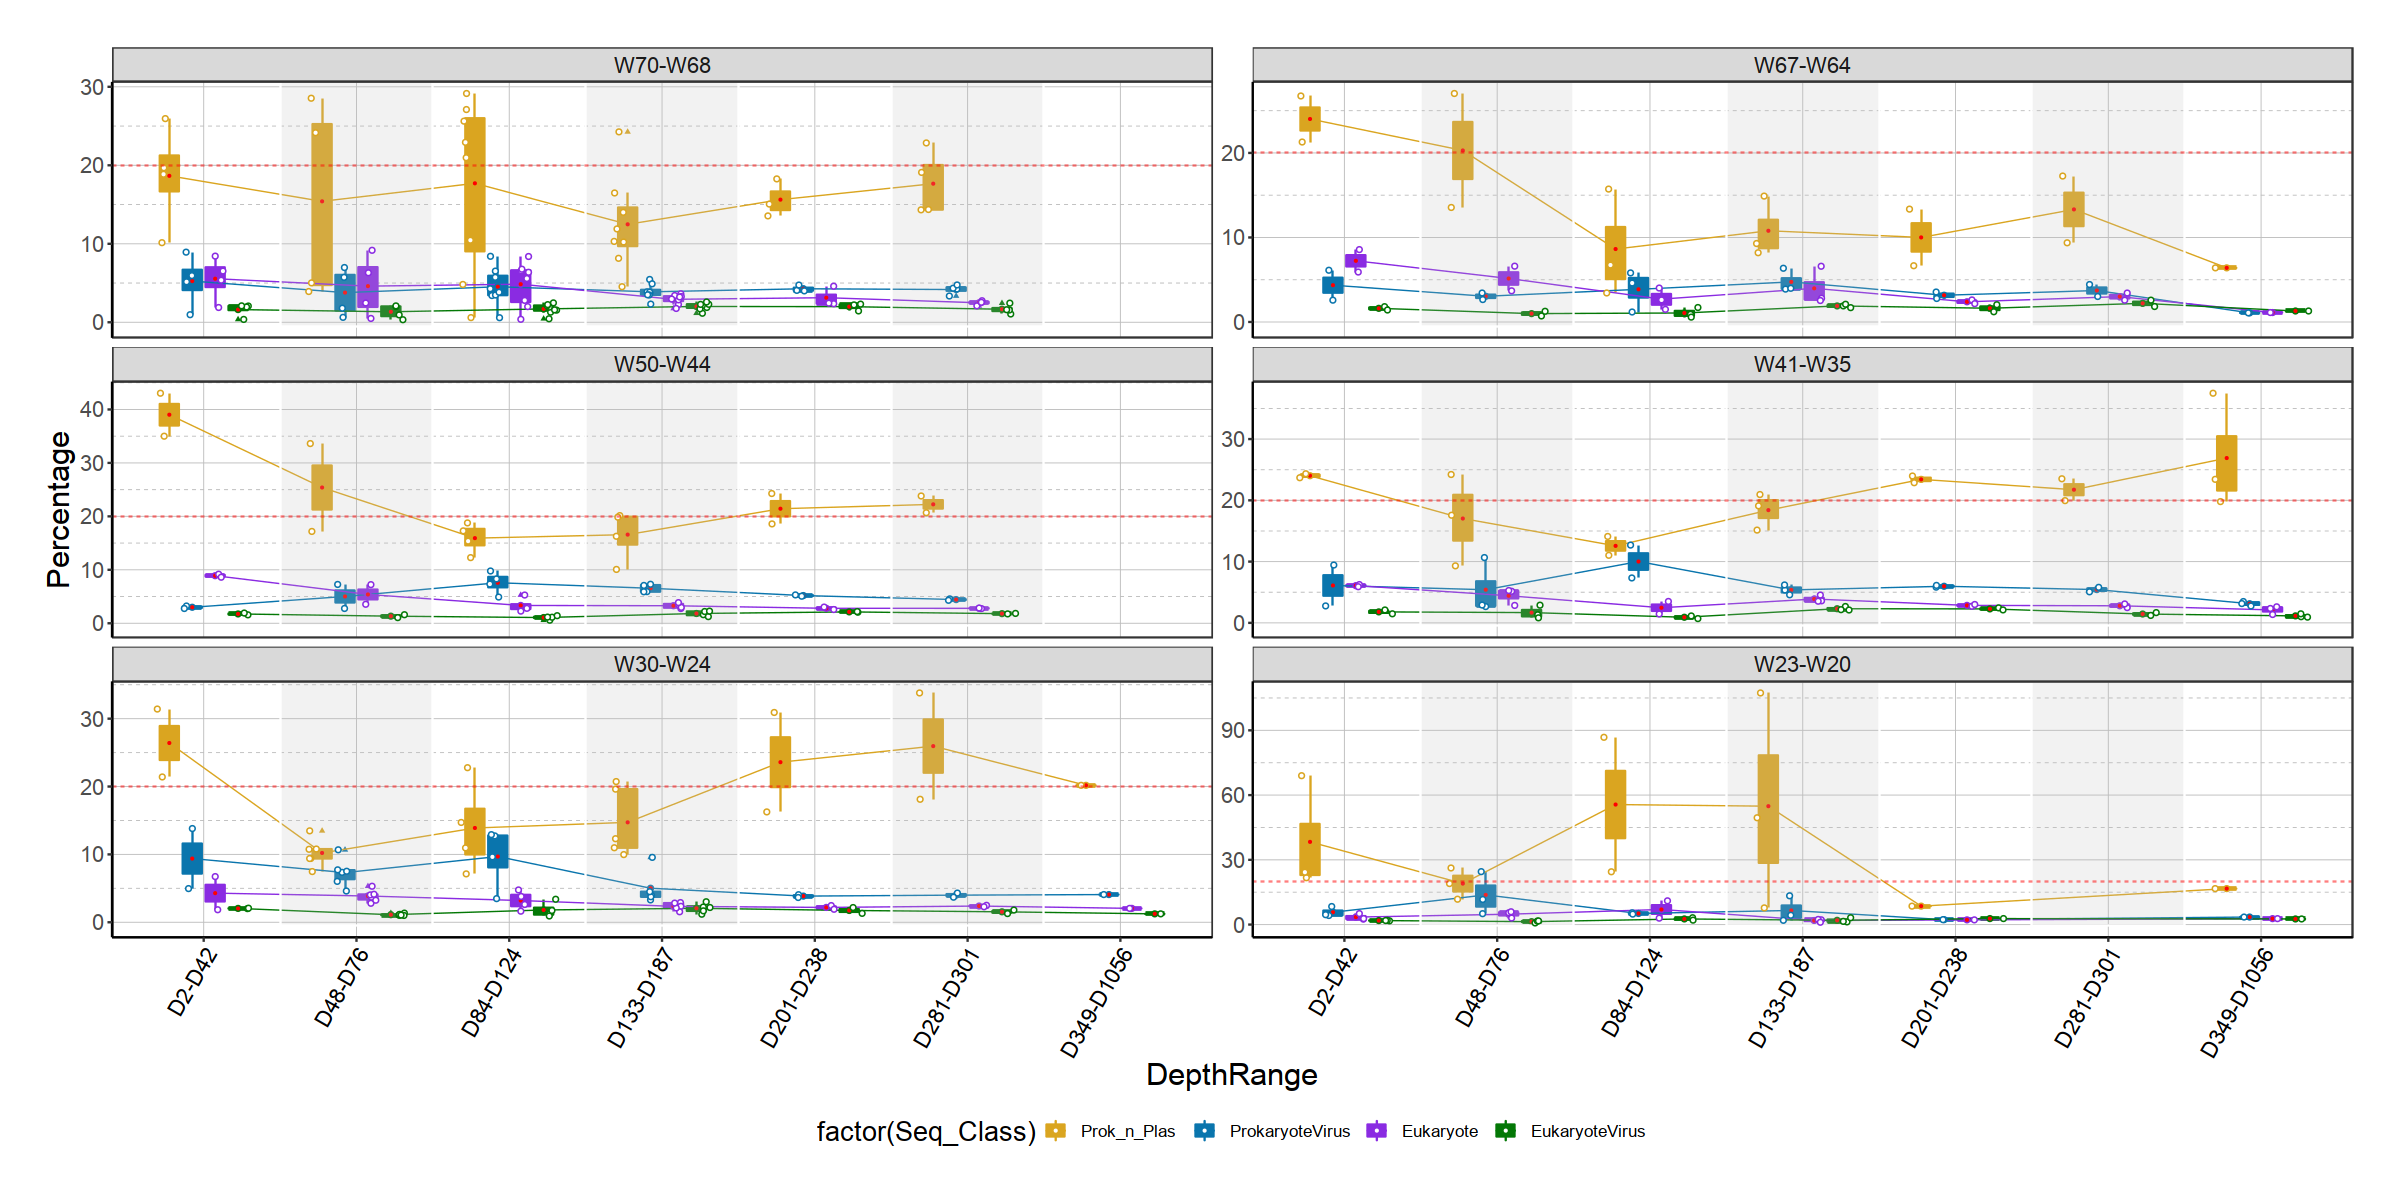

In [178]:
options(repr.plot.width=20, repr.plot.height=10)

p_4 <- ggplot(data=GA03_pct_meta_df2.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class), colour=factor(Seq_Class))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  stat_summary(aes(color=factor(Seq_Class)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + 
  facet_wrap(~LongitudeRange, nrow = 3, scales = "free_y")
p_4

In [65]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

In [66]:
GA03_pct_meta_df2.long.se <- summarySE(GA03_pct_meta_df2.long, measurevar="Percentage", groupvars=c("DepthRange","LongitudeRange", "Seq_Class"))
head(GA03_pct_meta_df2.long.se)

Warning message in qt(conf.interval/2 + 0.5, datac$N - 1):
“NaNs produced”


,DepthRange,LongitudeRange,Seq_Class,N,Percentage,sd,se,ci
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,D2-D42,W70-W68,Prok_n_Plas,4,18.657009,6.5009458,3.2504729,10.344456
2,D2-D42,W70-W68,ProkaryoteVirus,4,5.249773,3.2877724,1.6438862,5.231580
3,D2-D42,W70-W68,Eukaryote,4,5.549482,2.7523585,1.3761793,4.379617
4,D2-D42,W70-W68,EukaryoteVirus,4,1.618319,0.8390367,0.4195183,1.335095
5,D2-D42,W67-W64,Prok_n_Plas,2,24.016471,3.8526885,2.7242622,34.615033
6,D2-D42,W67-W64,ProkaryoteVirus,2,4.350521,2.5030772,1.7699429,22.489256


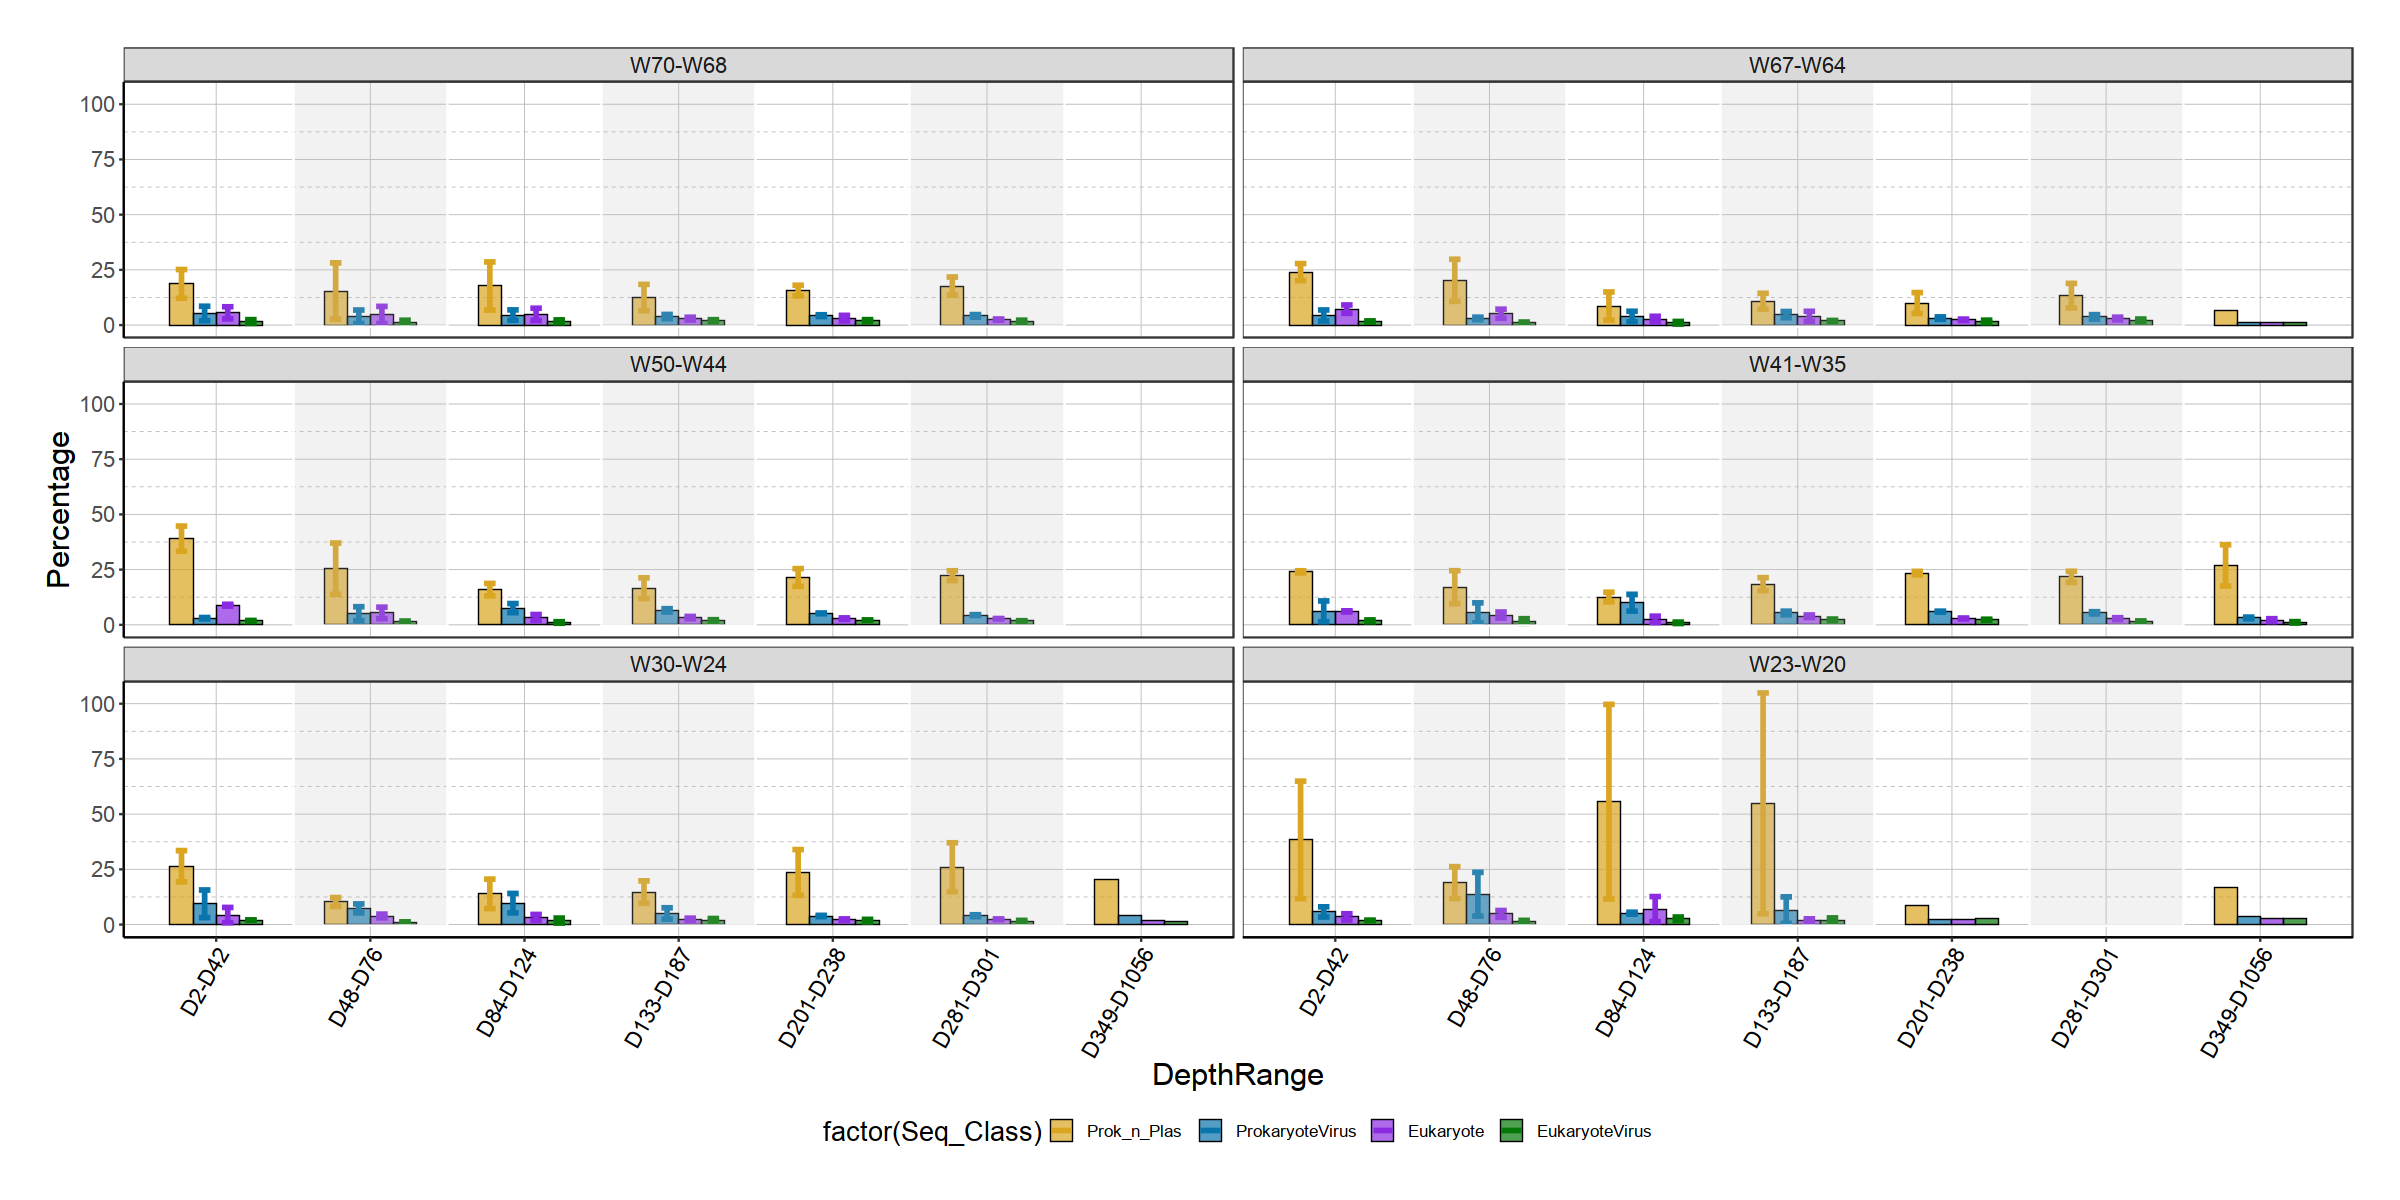

In [180]:
options(repr.plot.width=20, repr.plot.height=10)

ggplot(data=GA03_pct_meta_df2.long.se) +
  geom_bar(mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3, alpha=0.7) + 
  geom_errorbar(aes(x=DepthRange, ymin=Percentage-sd, ymax=Percentage+sd, color=factor(Seq_Class)), 
           position = position_dodge(width=.6), width=0.3, alpha=1, size=1.2) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~LongitudeRange, nrow = 3) + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))

* Calculate ratios of different percentages 

In [142]:
GA03_pct_meta_df3 <- GA03_pct_meta_df2 %>% 
  mutate(ProkVirProkRatio = ProkaryoteVirus/Prok_n_Plas) %>% 
  mutate(EukVirEukRatio = EukaryoteVirus/Eukaryote) %>% 
  mutate(ProkEukRatio = Prok_n_Plas/Eukaryote) %>% 
  mutate(ProkVirEukVirRatio = ProkaryoteVirus/EukaryoteVirus)
head(GA03_pct_meta_df3, 2)

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,⋯,Prokaryote,ProkaryoteVirus,TotalCnt,Prok_n_Plas,LongitudeRange,DepthRange,ProkVirProkRatio,EukVirEukRatio,ProkEukRatio,ProkVirEukVirRatio
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,SRR5788141,2011,11,11/16/2011,8,35.41617,-66.54077,31.3,37211638,8.564356,⋯,15.890682,6.120464,16089217,26.74073,W67-W64,D2-D42,0.2288817,0.2115166,3.122329,3.378666
2,SRR5788142,2011,11,11/16/2011,8,35.41617,-66.54077,68.0,17366844,3.685523,⋯,8.153594,2.652986,3577648,13.54816,W67-W64,D48-D76,0.1958189,0.1936712,3.676049,3.716814


In [158]:
GA03_pct_meta_df3.long <- GA03_pct_meta_df3 %>% 
  select(LongitudeRange, DepthRange, Depth, ProkVirProkRatio, EukVirEukRatio, ProkEukRatio, ProkVirEukVirRatio) %>% 
  gather(ProkVirProkRatio:ProkVirEukVirRatio, key="Comparison", value="Ratio") %>% 
  mutate(Comparison = factor(Comparison, levels=c("ProkVirProkRatio", "ProkEukRatio", "EukVirEukRatio", "ProkVirEukVirRatio"))) 

head(GA03_pct_meta_df3.long)

,LongitudeRange,DepthRange,Depth,Comparison,Ratio
,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,W67-W64,D2-D42,31.3,ProkVirProkRatio,0.2288817
2,W67-W64,D48-D76,68.0,ProkVirProkRatio,0.1958189
3,W67-W64,D84-D124,111.1,ProkVirProkRatio,0.6840500
4,W67-W64,D133-D187,135.8,ProkVirProkRatio,0.4190542
5,W67-W64,D133-D187,186.3,ProkVirProkRatio,0.2675167
6,W67-W64,D201-D238,237.3,ProkVirProkRatio,0.2653636


Warning message:
“Removed 1 rows containing missing values (geom_point).”


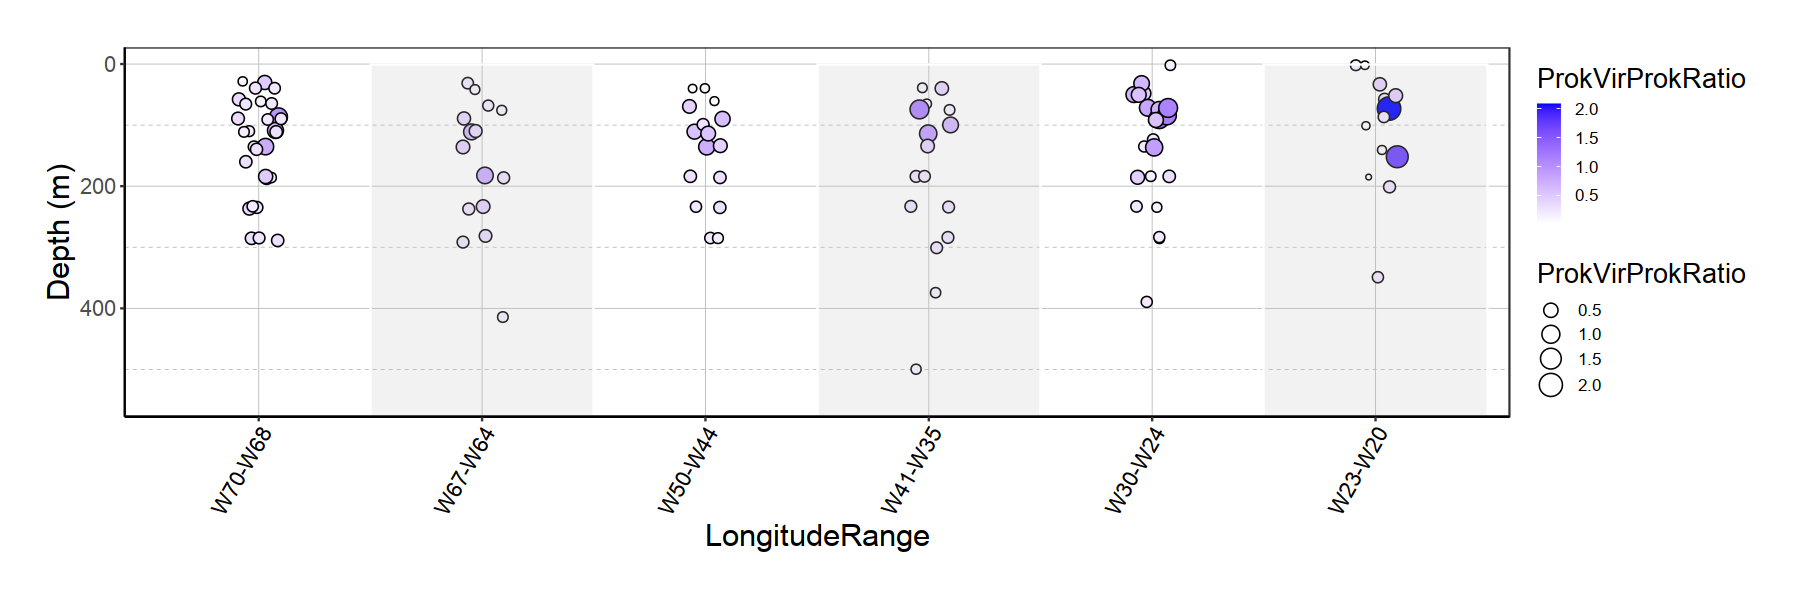

In [187]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=GA03_pct_meta_df3, mapping=aes(x=LongitudeRange, y=Depth, fill=ProkVirProkRatio)) + 
  geom_point(aes(size=ProkVirProkRatio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(550, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'white', high = 'blue') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

Warning message:
“Removed 1 rows containing missing values (geom_point).”


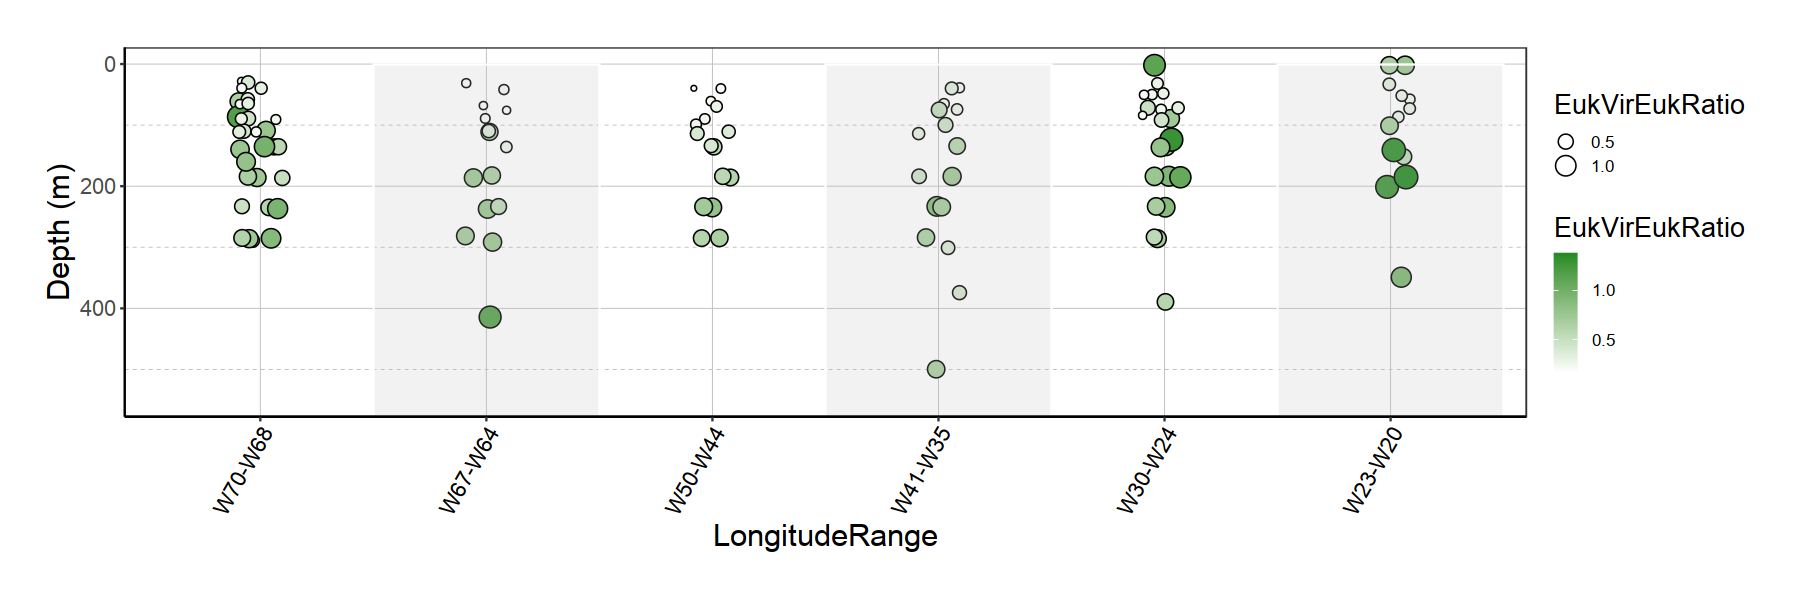

In [188]:
options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=GA03_pct_meta_df3, mapping=aes(x=LongitudeRange, y=Depth, fill=EukVirEukRatio)) + 
  geom_point(aes(size=EukVirEukRatio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(550, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_fill_gradient(low = 'white', high = 'forestgreen') +
  #scale_color_gradient2(low = 'blue', mid = 'white', high = 'red') +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

Warning message:
“Removed 4 rows containing missing values (geom_point).”


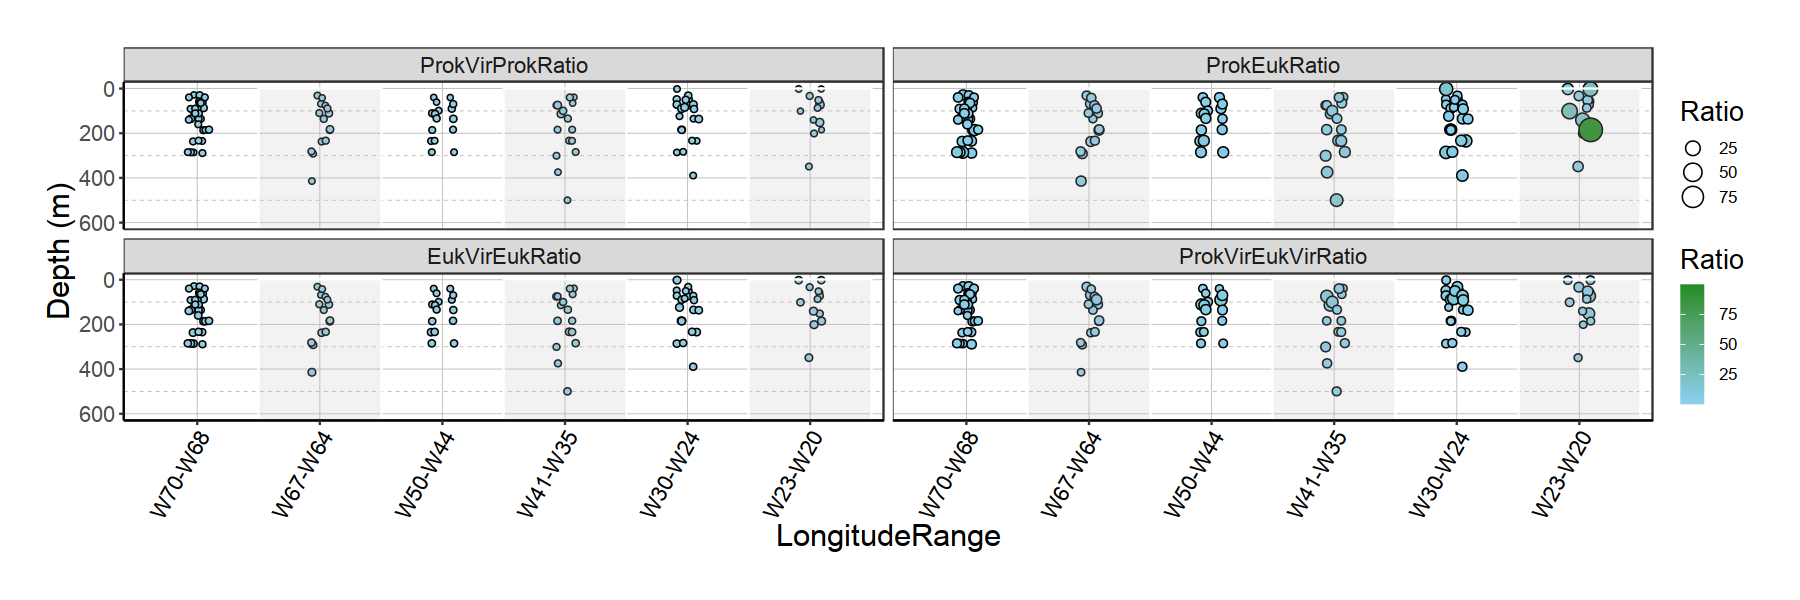

In [166]:
ggplot(data=GA03_pct_meta_df3.long, mapping=aes(x=LongitudeRange, y=Depth, fill=Ratio)) + 
  geom_point(aes(size=Ratio), color="black", pch = 21, position = position_jitterdodge(0.2)) + 
  scale_y_reverse(lim=c(600, 0)) + ylab("Depth (m)") +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = 0, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  #scale_fill_gradient(low = 'yellow', high = 'forestgreen') +
  scale_fill_gradient2(low = 'orange', mid="skyblue", high = 'forestgreen', midpoint = 4) +
  facet_wrap(~Comparison, nrow = 2) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1), legend.position = "right") 

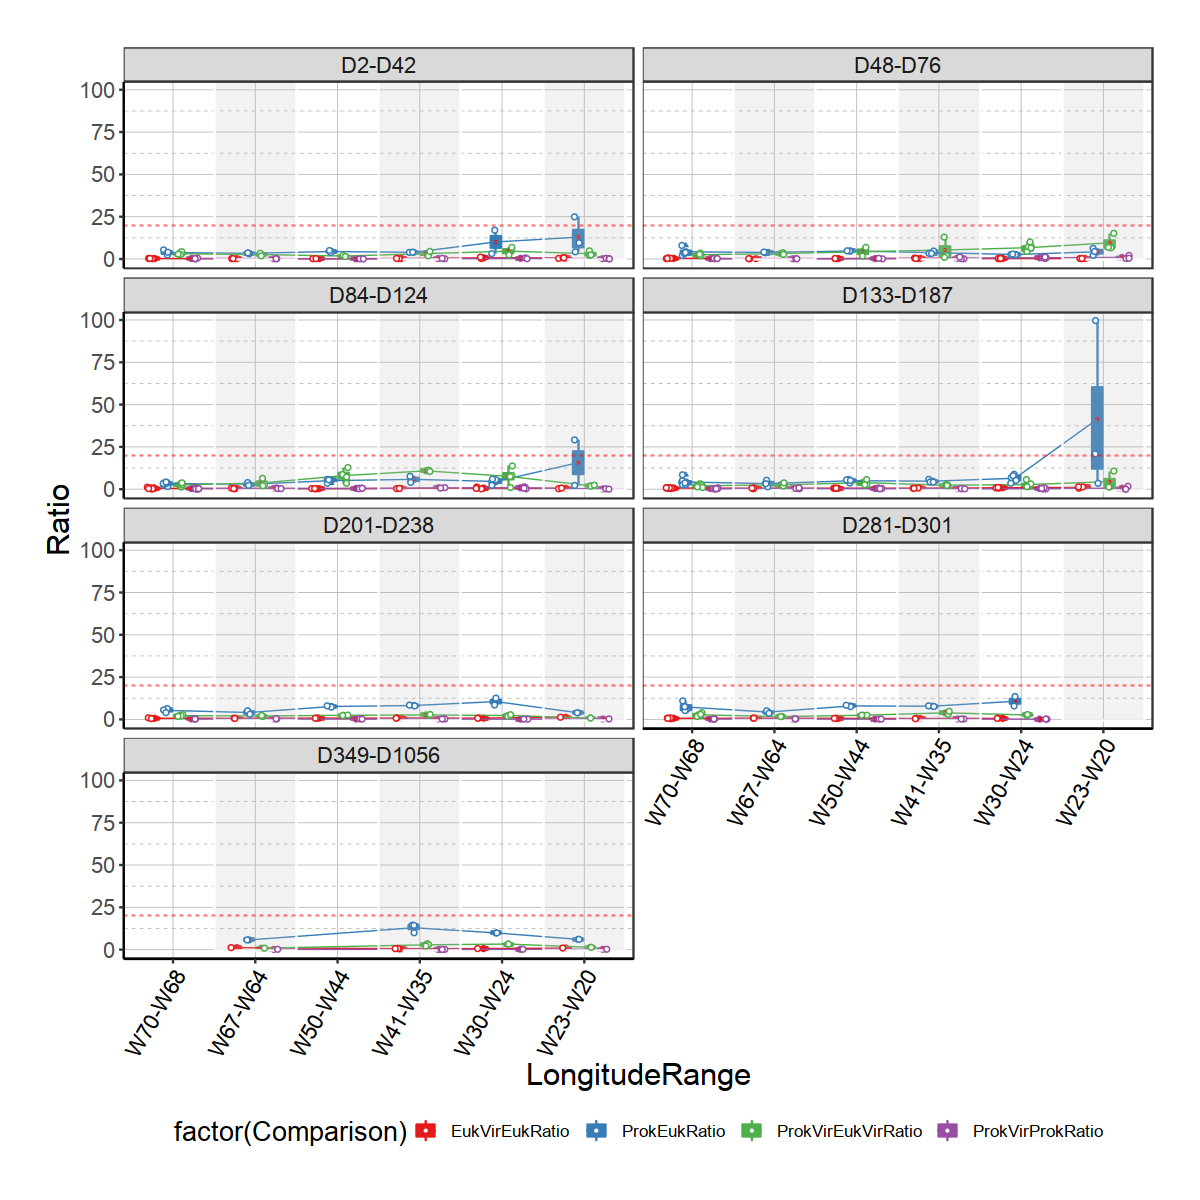

In [147]:
options(repr.plot.width=10, repr.plot.height=10)

pp <- ggplot(data=GA03_pct_meta_df3.long, mapping=aes(x=LongitudeRange, y=Ratio, fill=factor(Comparison), color=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 6) + 
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) 
pp

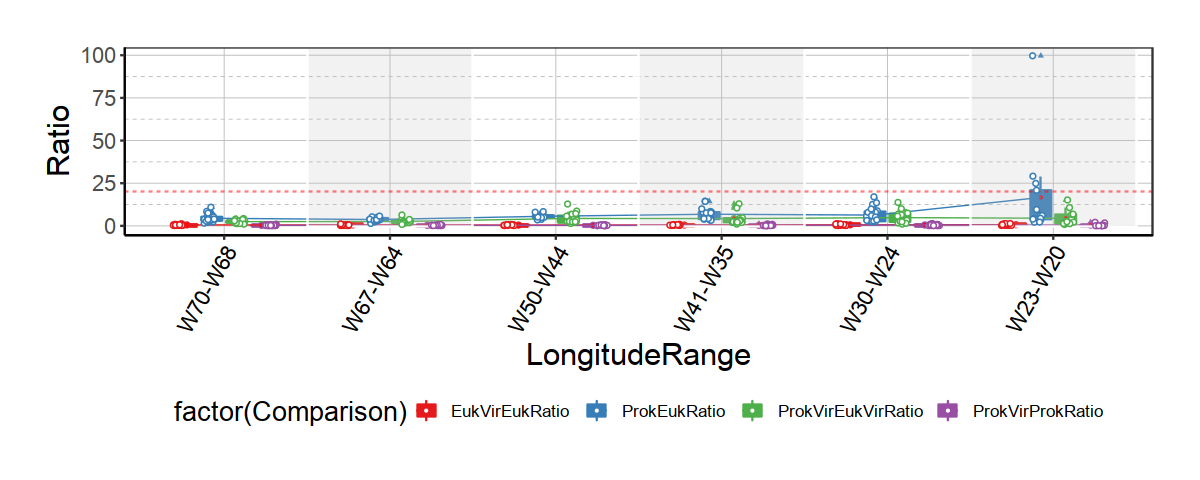

In [148]:
options(repr.plot.width=10, repr.plot.height=4)

pp_2 <- ggplot(data=GA03_pct_meta_df3.long, mapping=aes(x=LongitudeRange, y=Ratio, fill=factor(Comparison),colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
pp_2

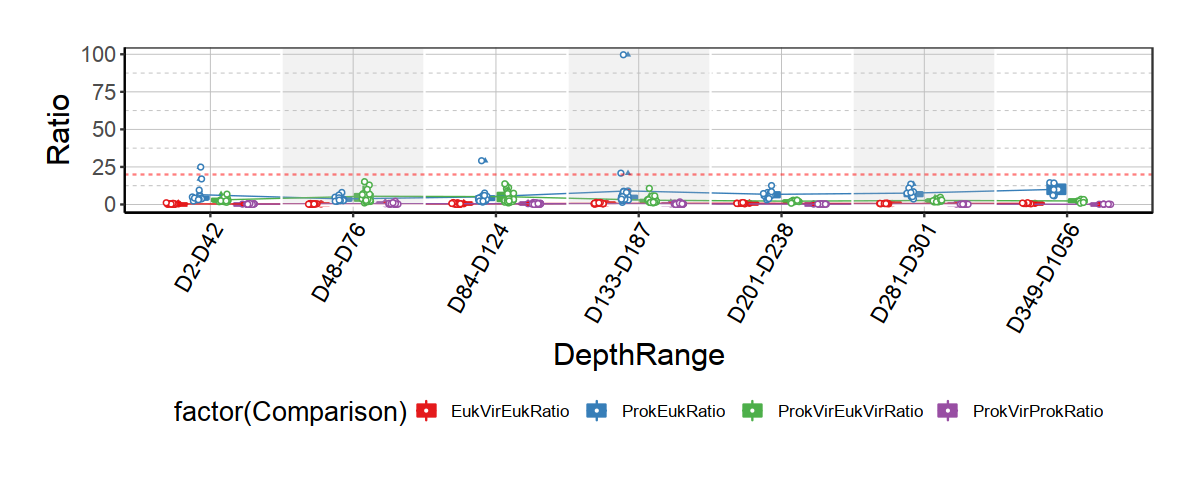

In [150]:
options(repr.plot.width=10, repr.plot.height=4)

pp_3 <- ggplot(data=GA03_pct_meta_df3.long, mapping=aes(x=DepthRange, y=Ratio, fill=factor(Comparison),colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
pp_3

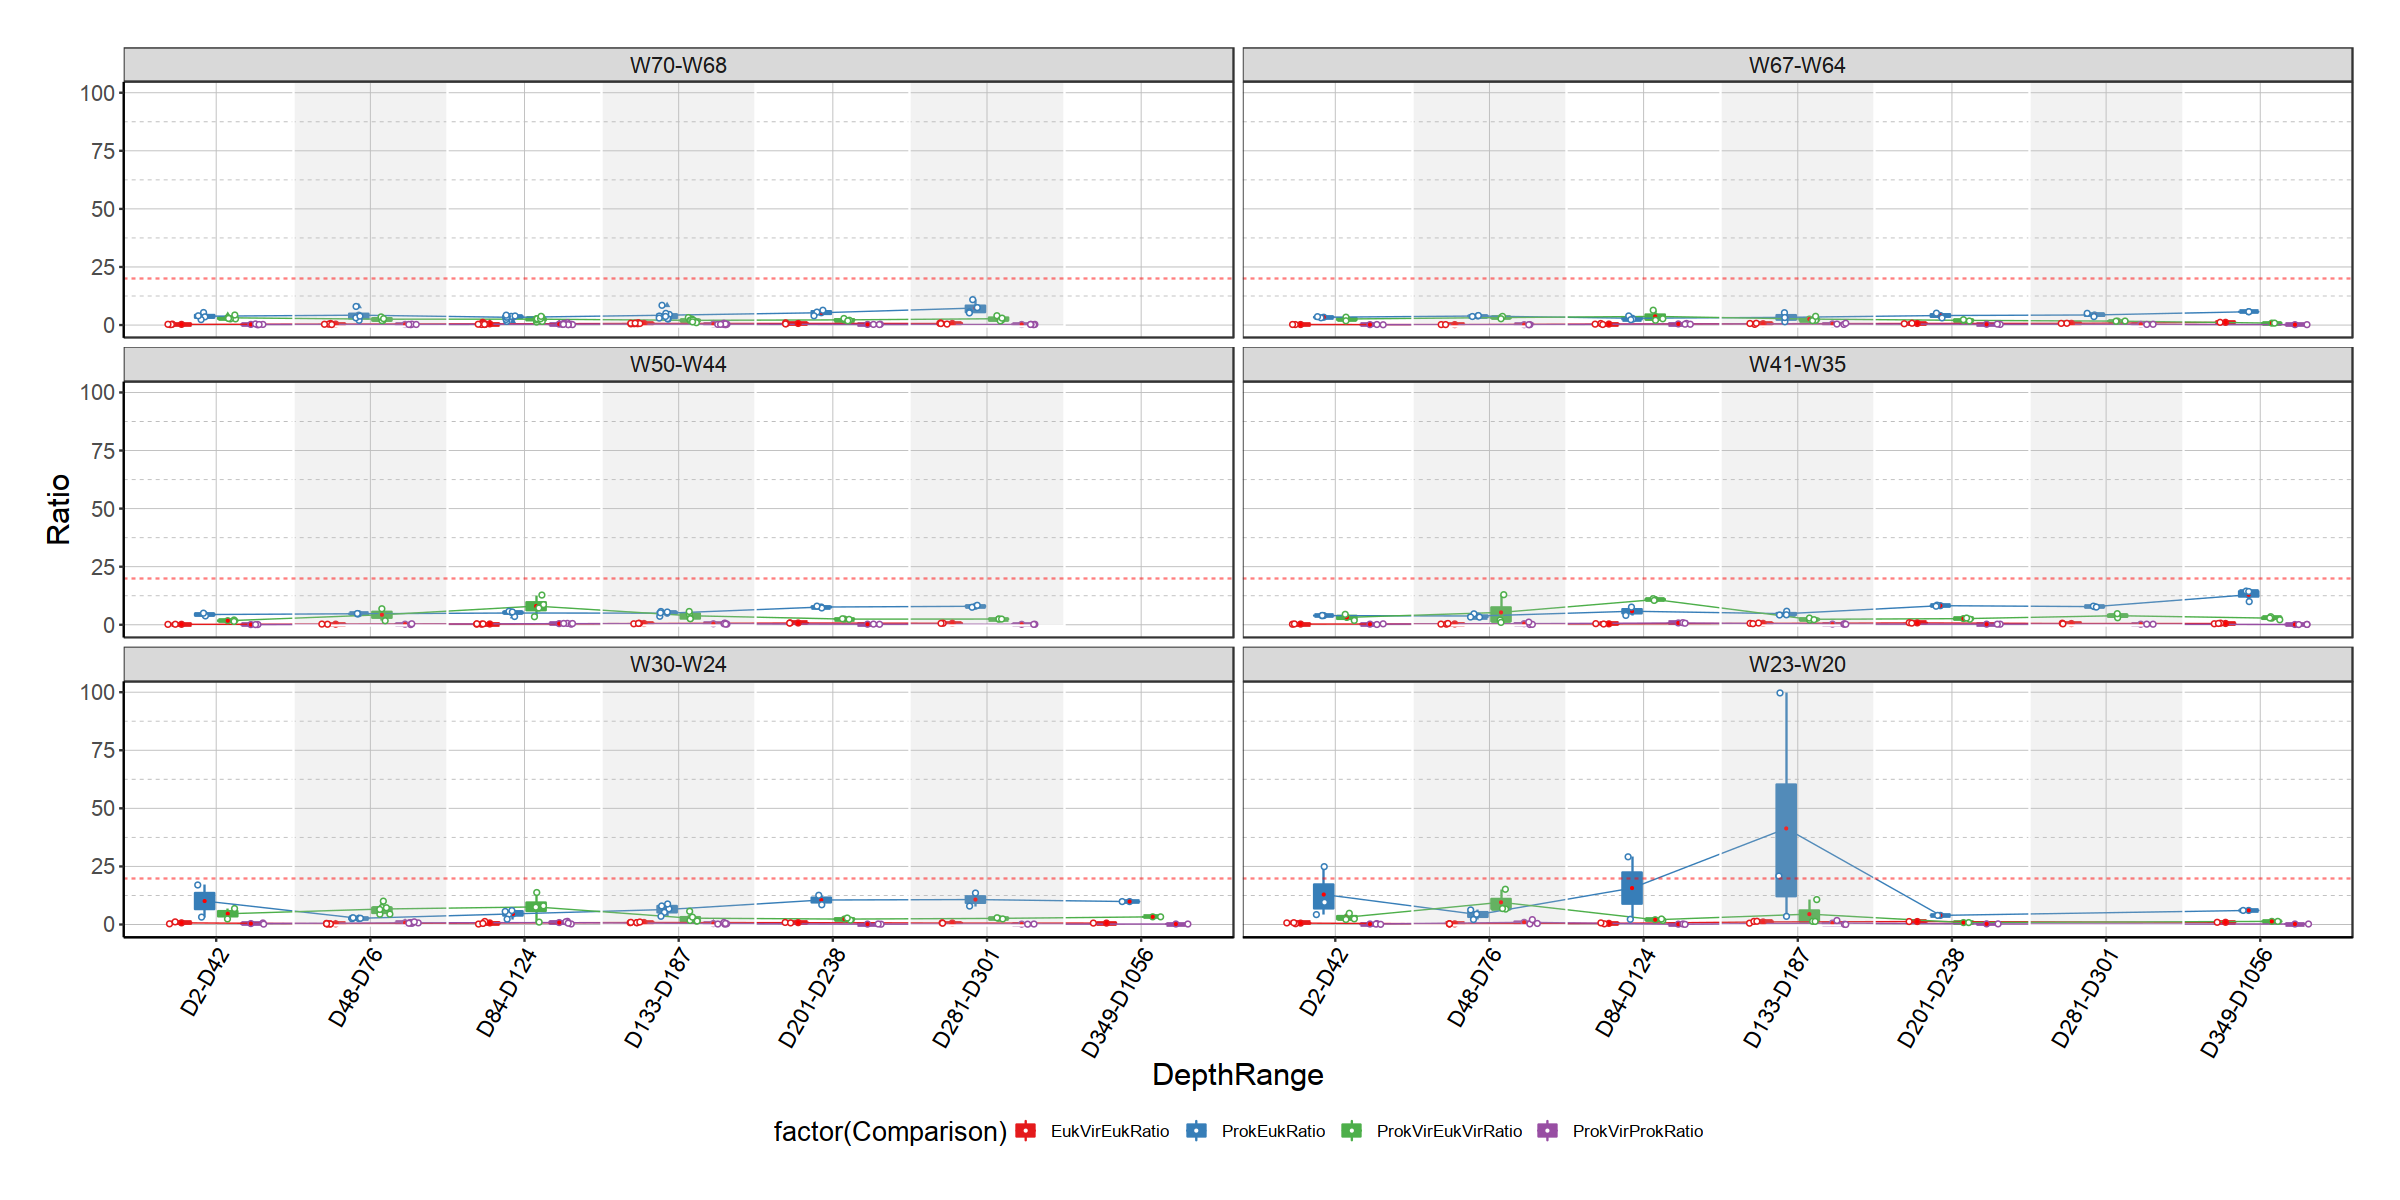

In [151]:
options(repr.plot.width=20, repr.plot.height=10)

pp_4 <- ggplot(data=GA03_pct_meta_df3.long, mapping=aes(x=DepthRange, y=Ratio, fill=factor(Comparison), colour=factor(Comparison))) + 
  geom_boxplot(outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Comparison, group=Comparison), fun=mean, geom="line", size=0.3, position = position_dodge(width=.6)) +
  stat_summary(aes(color=factor(Comparison)), fill="red", fun=mean, geom="point", pch=21, size=1, position = position_dodge(width=.6)) +
  geom_rect(data=rects_3, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Comparison)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=20, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + 
  facet_wrap(~LongitudeRange, nrow = 3)
pp_4

## MetaPhlAn3 

In [68]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(SPRING)
library(phyloseq)

In [69]:
# modified from https://www.biostars.org/p/455240/
metaphlanToPhyloseq <- function(
    tax,
    metadat=NULL,
    simplenames=TRUE,
    roundtointeger=FALSE,
    split="|"){
    ## tax is a matrix or data.frame with the table of taxonomic abundances, rows are taxa, columns are samples
    ## metadat is an optional data.frame of specimen metadata, rows are samples, columns are variables
    ## if simplenames=TRUE, use only the most detailed level of taxa names in the final object
    ## if roundtointeger=TRUE, values will be rounded to the nearest integer
    xnames = rownames(tax)
    shortnames = gsub(paste0(".+\\", split), "", xnames)
    if(simplenames){
        rownames(tax) = shortnames
    }
    if(roundtointeger){
        tax = round(tax * 1e4)
    }
    x2 = strsplit(xnames, split=split, fixed=TRUE)
    taxmat = matrix(NA, ncol=max(sapply(x2, length)), nrow=length(x2))
    colnames(taxmat) = c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species", "Strain")[1:ncol(taxmat)]
    rownames(taxmat) = rownames(tax)
    for (i in 1:nrow(taxmat)){
        taxmat[i, 1:length(x2[[i]])] <- x2[[i]]
    }
    taxmat = gsub("[a-z]__", "", taxmat)
    taxmat = phyloseq::tax_table(taxmat)
    otutab = phyloseq::otu_table(tax, taxa_are_rows=TRUE)
    if(is.null(metadat)){
        res = phyloseq::phyloseq(taxmat, otutab)
    }else{
        res = phyloseq::phyloseq(taxmat, otutab, phyloseq::sample_data(metadat))
    }
    return(res)
}

In [70]:
merged_metaphlan_tbl <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/merged_MetaPhlAn3_BioGEOTRACES_abundance_table.tab"
merged_metaphlan_df <- read.table(merged_metaphlan_tbl, header = T, row.names=1, sep = "\t", as.is = T, strip.white=T, stringsAsFactors = F)
merged_metaphlan_df <- merged_metaphlan_df[, -which(colnames(merged_metaphlan_df) == "NCBI_tax_id")] # remove NCBI_tax_id column
head(merged_metaphlan_df, 4)
#colnames(merged_metaphlan_df)

,SRR6507280,SRR6507279,SRR6507278,SRR6507277,SRR5788468,SRR5788467,SRR5788466,SRR5788465,SRR5788464,SRR5788463,⋯,SRR5720228,SRR5720227,SRR5720226,SRR5720225,SRR5720224,SRR5720223,SRR5720222,SRR5720221,SRR5720220,SRR5720219
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UNKNOWN,99.64535000,98.25117,99.06114000,97.96894,99.31169,99.1026600,97.47057,96.9029,99.262120000,98.07246,⋯,98.984000000,97.21526,99.5716100,99.4492300,99.4537100,99.632770000,96.44646,99.83633000,99.789290000,97.4411
k__Archaea,0.03269634,0.00000,0.01835311,0.00000,0.00000,0.6815456,0.00000,0.0000,0.004923887,0.00000,⋯,0.002295249,0.00000,0.0892929,0.0933124,0.3900638,0.002219108,0.00000,0.06005659,0.004678169,0.0000
k__Archaea|p__Candidatus_Heimdallarchaeota,0.00000000,0.00000,0.00000000,0.00000,0.00000,0.0000000,0.00000,0.0000,0.000000000,0.00000,⋯,0.000000000,0.00000,0.0000000,0.0000000,0.0000000,0.000000000,0.00000,0.00000000,0.000000000,0.0000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified,0.00000000,0.00000,0.00000000,0.00000,0.00000,0.0000000,0.00000,0.0000,0.000000000,0.00000,⋯,0.000000000,0.00000,0.0000000,0.0000000,0.0000000,0.000000000,0.00000,0.00000000,0.000000000,0.0000


In [71]:
metadata_file <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/biogeotraces_metadata_v2.tsv"
metadata_df <- read.table(metadata_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
rownames(metadata_df) <- metadata_df$NCBI_SRA_Acc
head(metadata_df, 2)
unique(metadata_df$Cruise_Series)

,Sample_Name,Sample_ID,Cruise_Series,GEOTRACES_Section,Cruise_ID,Cruise_Station,Collection_Date,Collection_Year,Collection_Month,Collection_Time,⋯,Longitude,Bottle_ID,NCBI_BioPrj,NCBI_SRA_Study,NCBI_BioSample,NCBI_SRA_Acc,Total_Read_Pairs,Total_Bases,NCBI_SRA_Accession_Contigs,Assembly_Method
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
SRR5788236,SRZ187206,S0001,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,-42.4467,631397,PRJNA385854,SRP110813,SAMN07136483,SRR5788236,20058749,6017624700,SRZ187206,metaSPAdes v3.9.0
SRR5788235,SRZ187207,S0002,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,-42.4467,631391,PRJNA385854,SRP110813,SAMN07136484,SRR5788235,29418997,8825699100,SRZ187207,metaSPAdes v3.9.0


[1] "GEOTRACES" "HOT"       "BATS"

In [72]:
ps <- metaphlanToPhyloseq(merged_metaphlan_df, metadat=metadata_df)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

In [73]:
ps.GA03 <- subset_samples(ps, GEOTRACES_Section == "GA03")
ps.GA03

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 114 samples ]
sample_data() Sample Data:       [ 114 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

In [74]:
ps_rownames <- rownames(sample_data(ps.GA03))
head(ps_rownames)

[1] "SRR5788466" "SRR5788465" "SRR5788464" "SRR5788463" "SRR5788456"
[6] "SRR5788455"

In [75]:
rownames(GA03_pct_meta_df2) <- GA03_pct_meta_df2$NCBI_SRA_Acc
GA03_pct_meta_df2 <- GA03_pct_meta_df2[ps_rownames,]
sample_data(ps.GA03)$LongitudeRange <- GA03_pct_meta_df2$LongitudeRange
sample_data(ps.GA03)$DepthRange <- GA03_pct_meta_df2$DepthRange
head(sample_data(ps.GA03), 2)

,Sample_Name,Sample_ID,Cruise_Series,GEOTRACES_Section,Cruise_ID,Cruise_Station,Collection_Date,Collection_Year,Collection_Month,Collection_Time,⋯,NCBI_BioPrj,NCBI_SRA_Study,NCBI_BioSample,NCBI_SRA_Acc,Total_Read_Pairs,Total_Bases,NCBI_SRA_Accession_Contigs,Assembly_Method,LongitudeRange,DepthRange
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<fct>,<fct>
SRR5788466,SRZ187423,S0232,GEOTRACES,GA03,KN199-4,7,10/24/2010,2010,10,11:14:00,⋯,PRJNA385854,SRP110813,SAMN07136700,SRR5788466,22328431,6698529300,SRZ187423,metaSPAdes v3.9.0,W23-W20,D48-D76
SRR5788465,SRZ187422,S0231,GEOTRACES,GA03,KN199-4,7,10/24/2010,2010,10,11:14:00,⋯,PRJNA385854,SRP110813,SAMN07136699,SRR5788465,37402264,11220679200,SRZ187422,metaSPAdes v3.9.0,W23-W20,D2-D42


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 114 samples ]
sample_data() Sample Data:       [ 114 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 41 taxa and 114 samples ]
sample_data() Sample Data:       [ 114 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 41 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


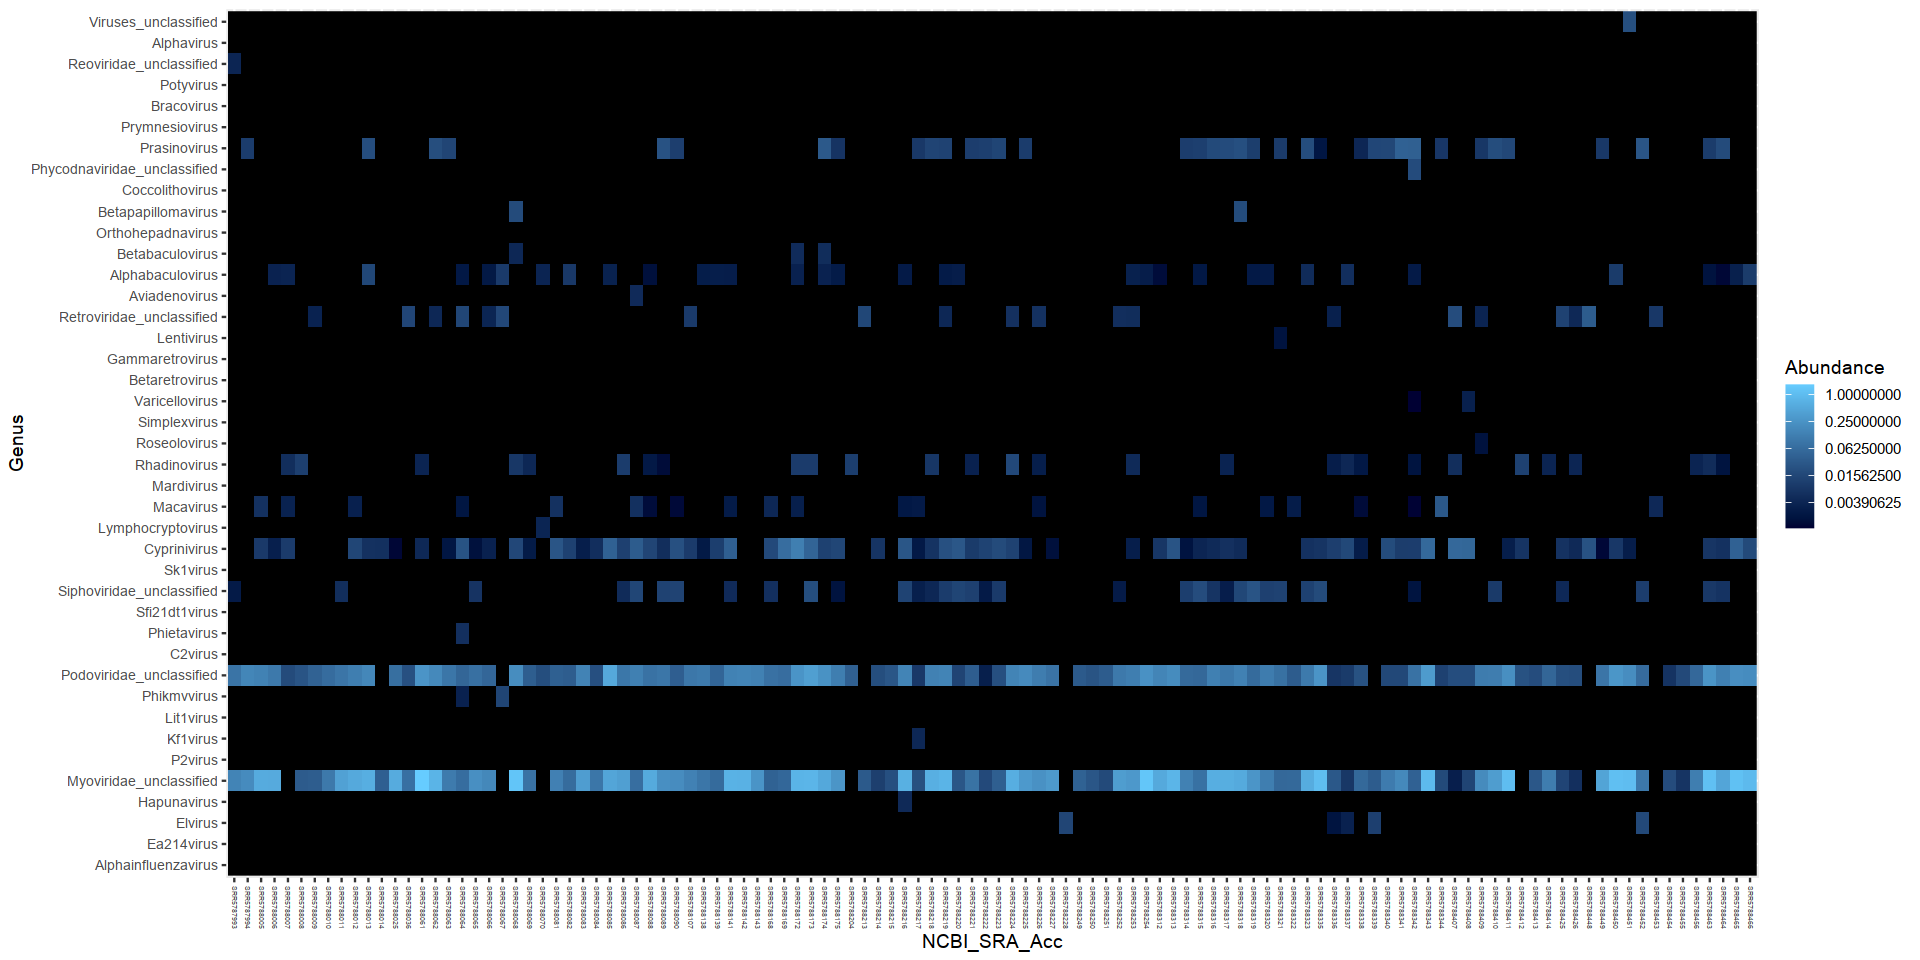

In [77]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps.GA03, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.genus <- subset_taxa(ps.vir, is.na(Species) & !is.na(Genus))
ps.vir.genus

plot_heatmap(ps.vir.genus,
             taxa.label="Genus", 
             taxa.order="Genus",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 114 samples ]
sample_data() Sample Data:       [ 114 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 114 samples ]
sample_data() Sample Data:       [ 114 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


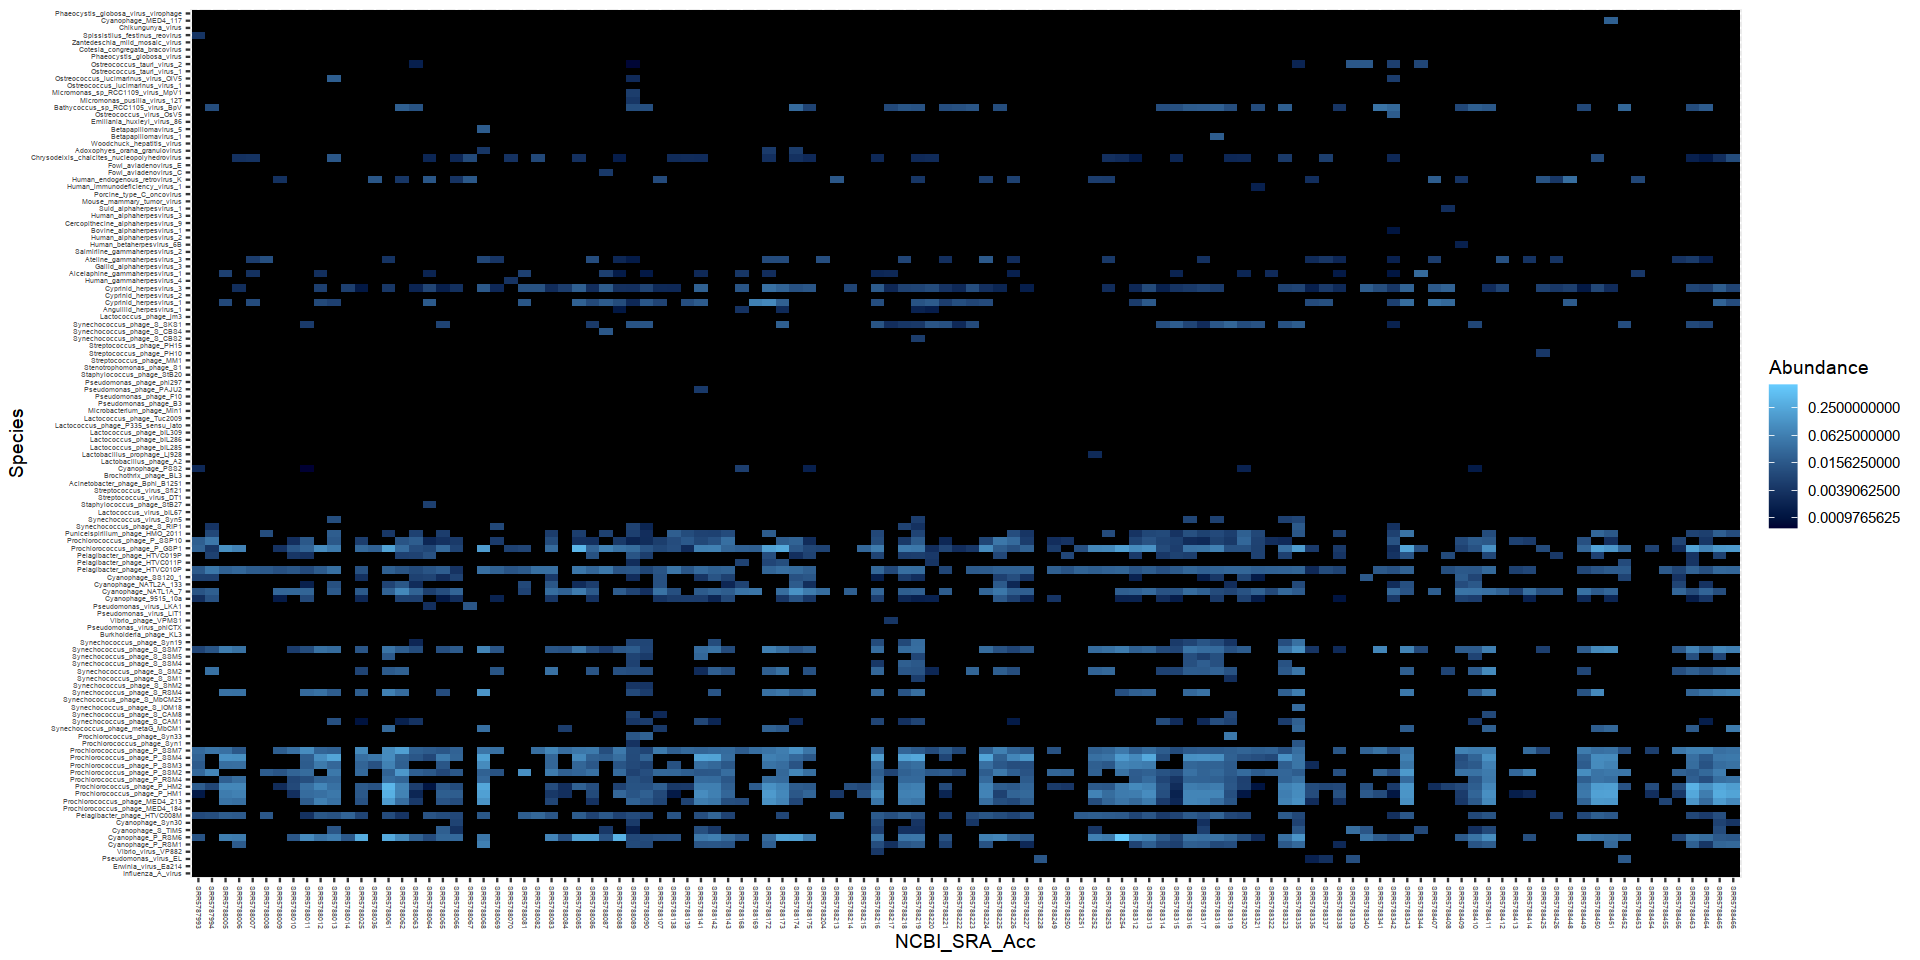

In [78]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps.GA03, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.species <- subset_taxa(ps.vir, !is.na(Species))
ps.vir.species

plot_heatmap(ps.vir.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

In [181]:
library(NetCoMi)

Loading required package: SpiecEasi





In [183]:
# keep only species with sum abundance >= 1e-1 across samples
ps.vir.species.fil <- prune_taxa(taxa_sums(ps.vir.species) >= 0.06, ps.vir.species)
# keep only samples with sum abundance >= 1e-1 across taxa
ps.vir.species.fil <- prune_samples(sample_sums(ps.vir.species.fil) >= 0.06, ps.vir.species.fil)

net_single_vir <- netConstruct(ps.vir.species.fil,
                           #filtTax = "highestFreq",
                           #filtTaxPar = list(highestFreq = 100),
                           #filtSamp = "totalReads",
                           #filtSampPar = list(totalReads = 0.01),
                           measure = "spring", # "pearson",
                           #measurePar = list(nlambda=10, 
                           #                  rep.num=10),
                           normMethod = "clr", 
                           zeroMethod = "multRepl",
                           sparsMethod = "threshold", 
                           thresh = 0.3,
                           dissFunc = "signed",
                           verbose = 3,
                           seed = 123456)

Infos about changed arguments:

Zero handling included in 'spring'.
Normalization ignored for measure 'spring'.
Sparsification included in 'spring'.


38 taxa and 89 samples remaining.


Calculate 'spring' associations ... 




The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann grap

Done.



In [184]:
props_single_vir <- netAnalyze(net_single_vir, 
                           centrLCC = TRUE,
                           avDissIgnoreInf = TRUE,
                           sPathNorm = FALSE,
                           clustMethod = "cluster_fast_greedy",
                           hubPar = "eigenvector", # hubPar = c("degree", "between", "closeness"),
                           hubQuant = 0.9,
                           lnormFit = TRUE,
                           weightDeg = FALSE, 
                           normBetw = FALSE,
                           normClose = FALSE,
                           normEigen = FALSE,
                           normDeg = FALSE)

#?summary.microNetProps
#summary(props_single_vir, numbNodes = 5L)

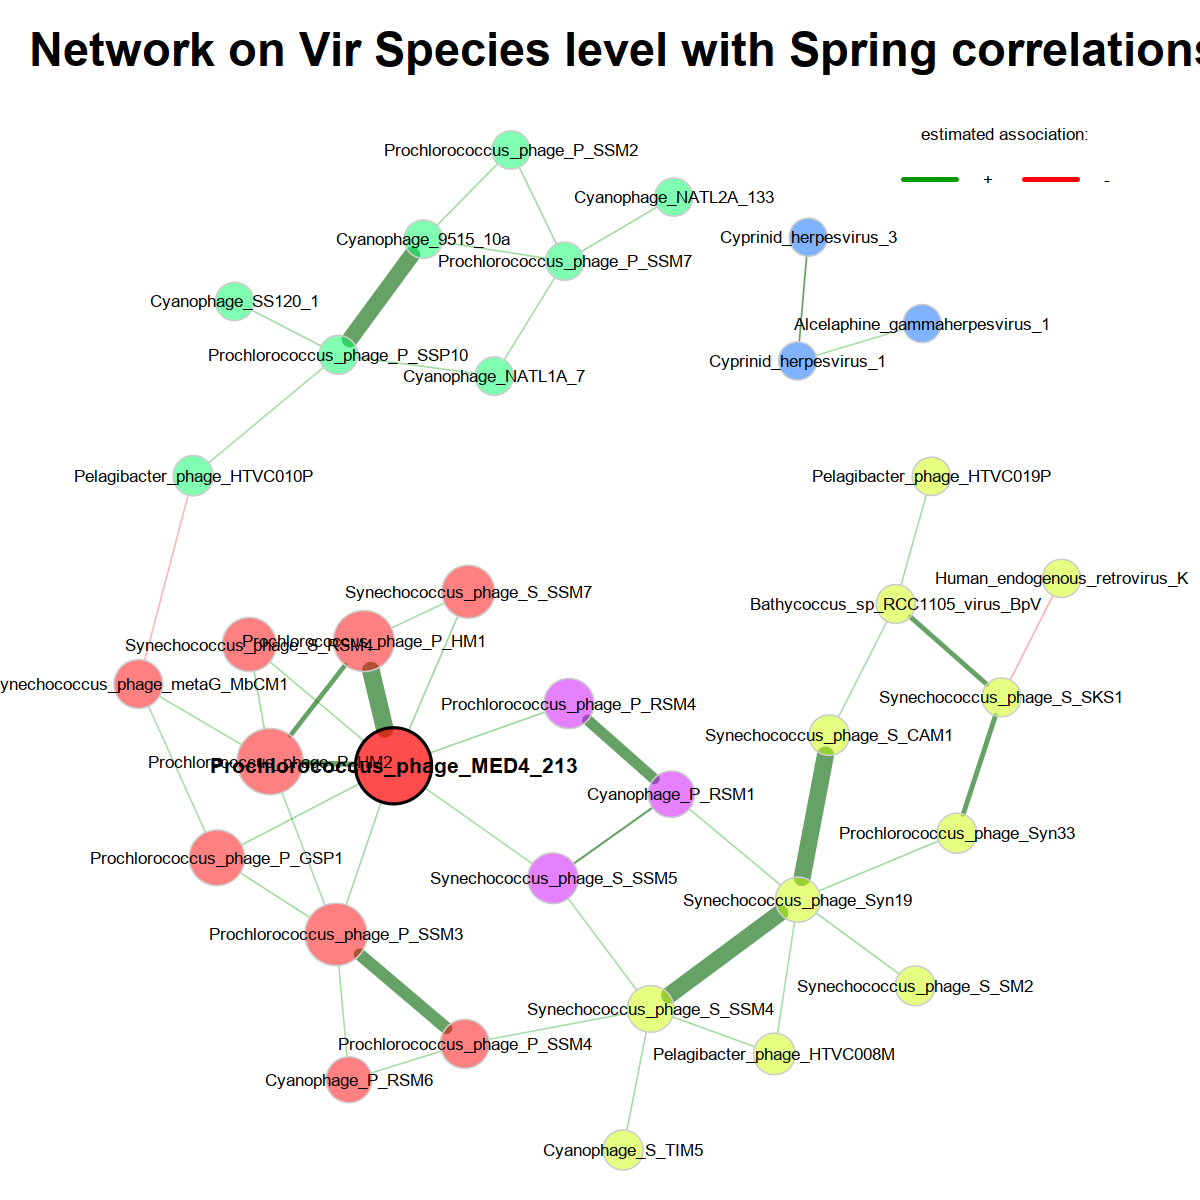

In [185]:
options(repr.plot.width=10, repr.plot.height=10)

p_vir <- plot(props_single_vir,
          layout = "layout_with_fr",
          labelScale = FALSE,
          rmSingles = TRUE,
          shortenLabels = "simple",
          labelLength = 50,
          charToRm = "s__",
          nodeColor = "cluster", 
          nodeSize = "eigenvector", # clr
          nodeSizeSpread = 3,
          hubBorderCol = "black",
          repulsion = 0.8,
          cexNodes = 3,
          cexLabels = 0.8,
          cexHubLabels = 1,
          title1 = "Network on Vir Species level with Spring correlations", 
          showTitle = TRUE,
          cexTitle = 2.3, 
          edgeTranspLow = 60, 
          edgeTranspHigh = 40,
          nodeTransp = 50, 
          hubTransp = 30
         )


legend(0.6, 1.1, cex = 0.8, title = "estimated association:",
       legend = c("+","-"), lty = 1, lwd = 3, col = c("#009900","red"), 
       bty = "n", horiz = TRUE)

In [81]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.prok <- subset_taxa(ps.GA03, Kingdom %in% c("Bacteria", "Archaea"))
ps.prok

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.prok.species <- subset_taxa(ps.prok, !is.na(Species))
ps.prok.species

# get HOT Prokaryotes abundance table
prok_species_abund <- t(otu_table(ps.prok.species))
ncol(prok_species_abund)
# colnames(HOT_pro_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(prok_species_abund) >= 1e-1
prok_species_abund <- prok_species_abund[, keep_cols]
ncol(prok_species_abund)
head(prok_species_abund, 2)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 114 samples ]
sample_data() Sample Data:       [ 114 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 114 samples ]
sample_data() Sample Data:       [ 114 samples by 29 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

[1] 111

[1] 17

,s__Candidatus_Nitrosopelagicus_brevis,s__Thaumarchaeota_archaeon_SCGC_AC_337_F14,s__Prochlorococcus_marinus,s__Synechococcus_sp_KORDI_49,s__Synechococcus_sp_WH_8109,s__Alphaproteobacteria_bacterium_MarineAlpha12_Bin1,s__Alphaproteobacteria_bacterium_MarineAlpha3_Bin6,s__Alphaproteobacteria_bacterium_MarineAlpha3_Bin7,s__Sulfitobacter_pontiacus,s__Alteromonas_australica,s__Alteromonas_macleodii,s__Alteromonas_mediterranea,s__Marinobacter_salarius,s__Pseudoalteromonas_agarivorans,s__Alcanivorax_sp_DG881,s__Bermanella_sp,s__Thalassolituus_sp_HI0120
SRR5788466,0,0,1.381370,0,0.005599916,0,0,0,0,0.000000000,0.00000000,0,0,0,0,0,0
SRR5788465,0,0,1.660997,0,0.005977101,0,0,0,0,0.006191421,0.01303107,0,0,0,0,0,0


In [89]:
library("RColorBrewer")

# sort abundance table accroding to sample metadata
# the metadata has to be in data.frame, not phyloseq sample.data format
sample_metadata <- data.frame(sample_data(ps.GA03)[, c("DepthRange", "LongitudeRange")])
sample_metadata <- with(sample_metadata, sample_metadata[order(LongitudeRange, DepthRange),])

depth_levels <- levels(sample_metadata$DepthRange)
depth_colors <- setNames(brewer.pal(length(depth_levels), "BuPu"), depth_levels)
longitude_levels <- levels(sample_metadata$LongitudeRange)
longitude_colors <- setNames(colorRampPalette(brewer.pal(11, "RdYlGn"))(length(longitude_levels)), longitude_levels)


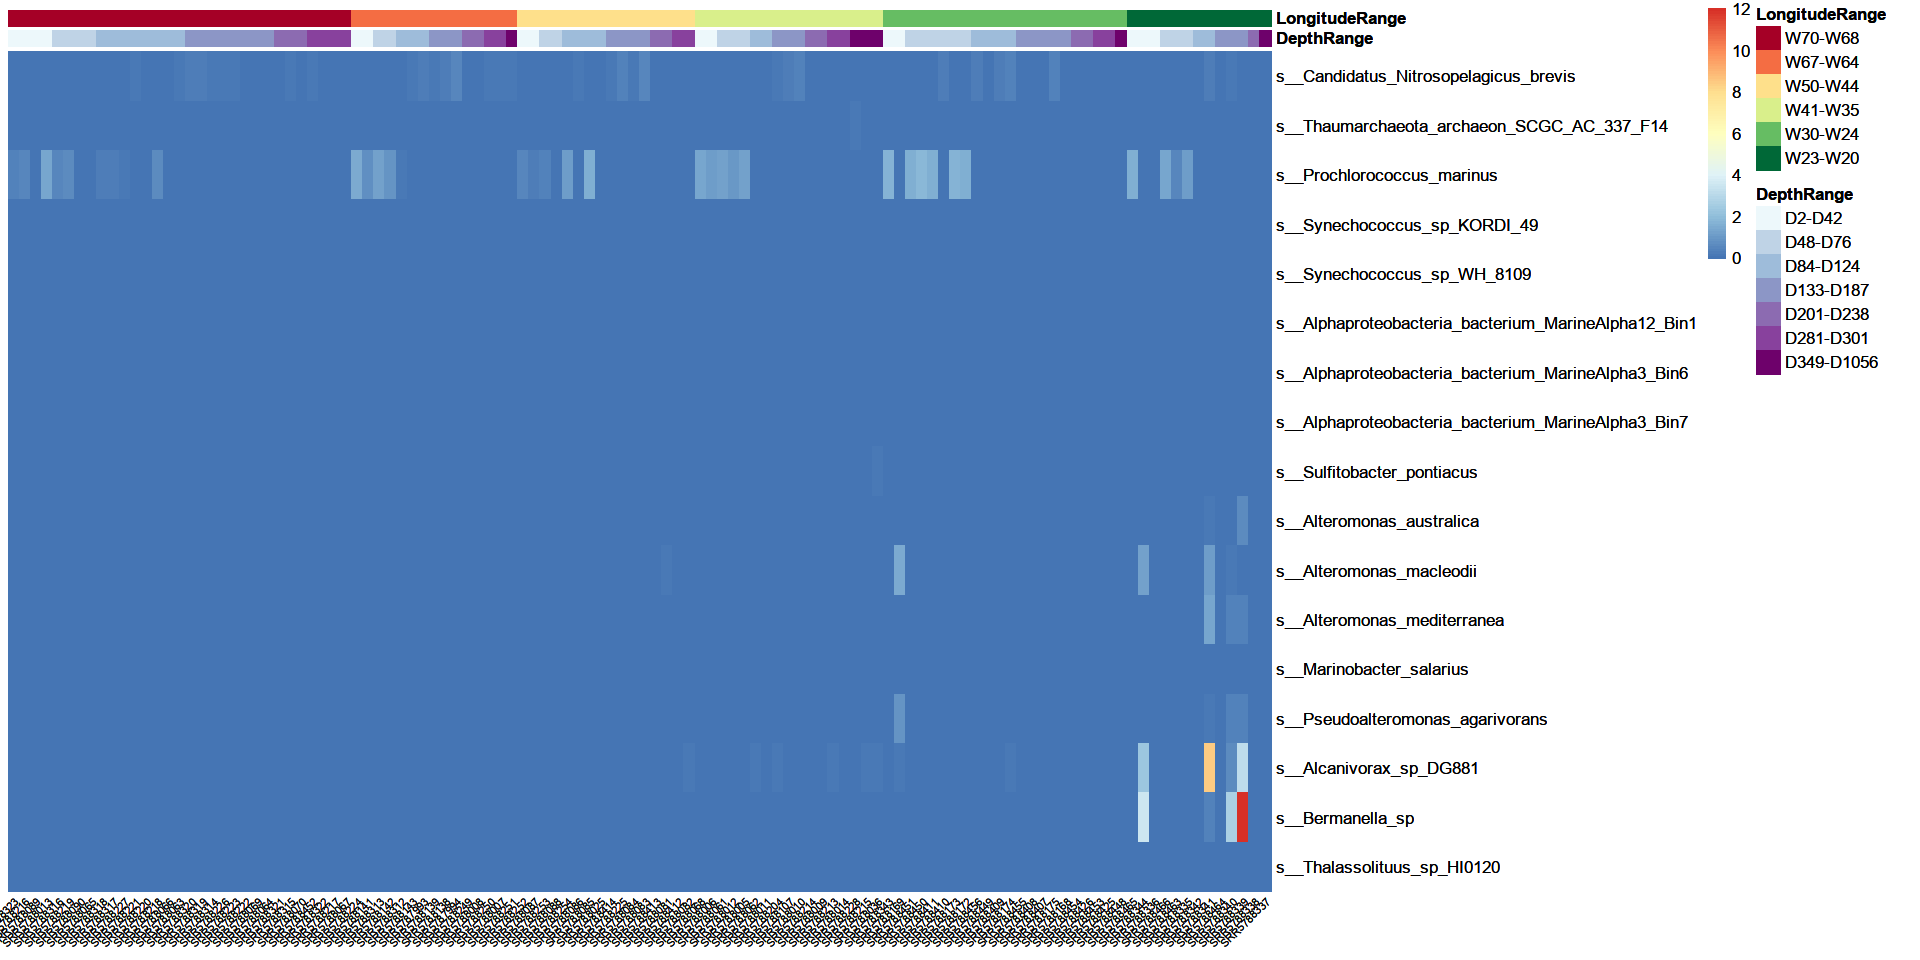

In [90]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
prok_species_abund.t <- t(prok_species_abund)
prok_species_abund.t <- prok_species_abund.t[, rownames(sample_metadata)]
pheat.prok <- pheatmap(prok_species_abund.t, 
         #legend_breaks = 0:3, legend_labels = paste('1e', 0:3, sep=''), 
         cluster_cols = F, 
         cluster_rows = F, 
         annotation_col = sample_metadata,     
         annotation_colors = list(
             DepthRange = depth_colors,
             LongitudeRange = longitude_colors),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

print(pheat.prok)

In [91]:
# get HOT Prokaryotes abundance table
vir_species_abund <- t(otu_table(ps.vir.species))
ncol(vir_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(vir_species_abund) >= 1e-1
vir_species_abund <- vir_species_abund[, keep_cols]
ncol(vir_species_abund)
head(vir_species_abund, 2)

[1] 120

[1] 36

,s__Cyanophage_P_RSM1,s__Cyanophage_P_RSM6,s__Cyanophage_S_TIM5,s__Pelagibacter_phage_HTVC008M,s__Prochlorococcus_phage_MED4_213,s__Prochlorococcus_phage_P_HM1,s__Prochlorococcus_phage_P_HM2,s__Prochlorococcus_phage_P_RSM4,s__Prochlorococcus_phage_P_SSM2,s__Prochlorococcus_phage_P_SSM3,⋯,s__Prochlorococcus_phage_P_GSP1,s__Prochlorococcus_phage_P_SSP10,s__Puniceispirillum_phage_HMO_2011,s__Synechococcus_phage_S_SKS1,s__Cyprinid_herpesvirus_1,s__Cyprinid_herpesvirus_3,s__Ateline_gammaherpesvirus_3,s__Human_endogenous_retrovirus_K,s__Chrysodeixis_chalcites_nucleopolyhedrovirus,s__Bathycoccus_sp_RCC1105_virus_BpV
SRR5788466,0.02742717,0.01427891,0.000000000,0.00000000,0.08923213,0.2178228,0.1728416,0.04062222,0.00000000,0.03906029,⋯,0.1580431,0,0.01004287,0,0.009959902,0.007126177,0,0,0.009785371,0
SRR5788465,0.02473471,0.01623037,0.009595757,0.01064599,0.16517661,0.2852993,0.2460984,0.03518620,0.05812986,0.03301792,⋯,0.1461211,0,0.01969696,0,0.023332343,0.018491569,0,0,0.003008837,0


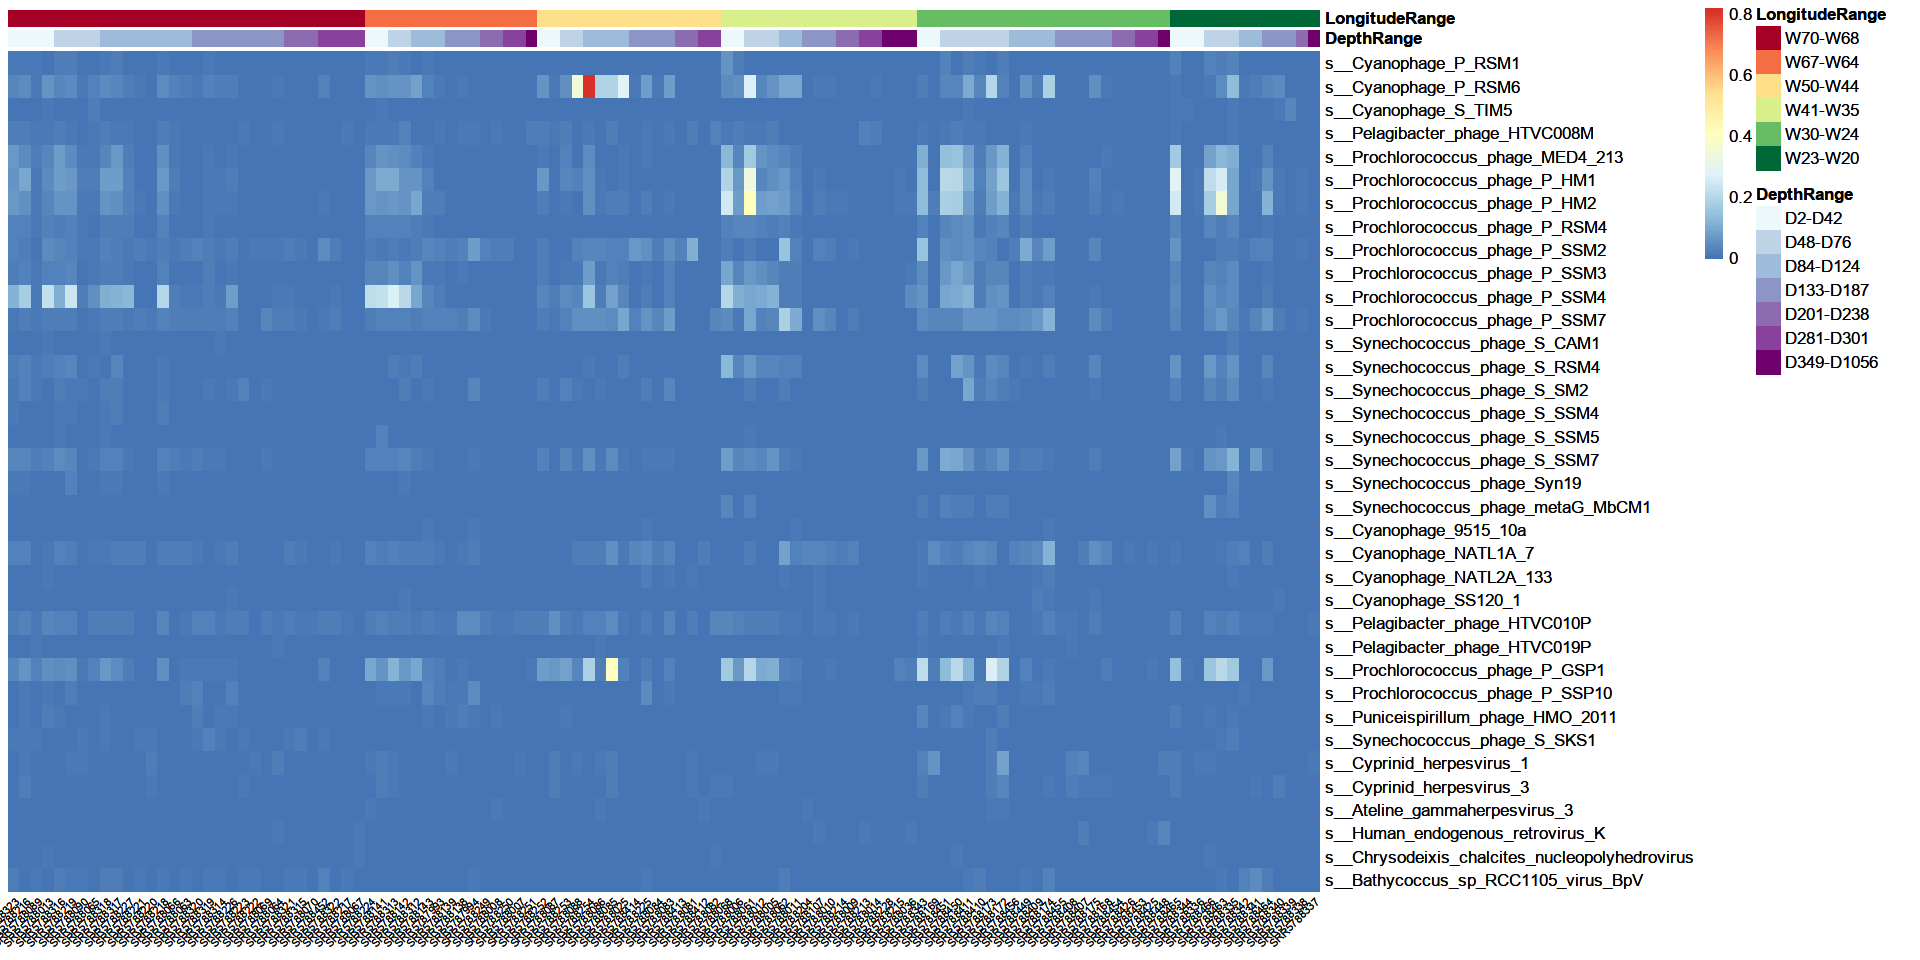

In [92]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
vir_species_abund.t <- t(vir_species_abund)
vir_species_abund.t <- vir_species_abund.t[, rownames(sample_metadata)]
pheat.vir <- pheatmap(vir_species_abund.t, 
         #legend_breaks = 0:3, legend_labels = paste('1e', 0:3, sep=''), 
         cluster_cols = F, 
         cluster_rows = F, 
         annotation_col = sample_metadata,     
         annotation_colors = list(
             DepthRange = depth_colors,
             LongitudeRange = longitude_colors),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

print(pheat.vir)